In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных по нефтяным скважинам

In [85]:
pd.read_csv('gas_well_data.csv', index_col=0)

Formation/Reservoir   Initial Pressure Estimate (psi)   \
PEACOCK         MARCELLUS - UPPER                               3150   
EGRET                   MARCELLUS                               5227   
MYNAH           HAYNESVILLE SHALE                               9800   
HARPY           HAYNESVILLE SHALE                              11325   
LOON            HAYNESVILLE SHALE                              10000   
CANARY          MARCELLUS - UPPER                               4300   
IBIS                    MARCELLUS                               5508   
OWL             MARCELLUS - UPPER                               2200   
STILT           HAYNESVILLE SHALE                              10800   
ROOSTER         HAYNESVILLE SHALE                              10500   
OSTRICH                 MARCELLUS                               3486   
STORK                   MARCELLUS                               3000   
HUMMINGBIRD     MARCELLUS - UPPER                               4000   
PHEASANT                MARCELLUS                               4450   
PENGUIN         MARCELLUS - UPPER                               3400   
FINCH           MARCELLUS - UPPER                               4300   
SEAGULL         MARCELLUS - UPPER                               4400   
BLUEBIRD        MARCELLUS - UPPER                               4200   
FLAMINGO        MARCELLUS - UPPER                               4500   
EMU                     MARCELLUS                               5531   
TOUCAN          MARCELLUS - UPPER                               3900   
ALBATROSS       MARCELLUS - UPPER                               5000   
CASSOWARY       HAYNESVILLE SHALE                              12223   
MACAW           MARCELLUS - UPPER                               4609   
DUCK                    MARCELLUS                               3900   
PELICAN         MARCELLUS - UPPER                               2500   
PARTRIDGE       HAYNESVILLE SHALE                               9900   
BEE-EATER       HAYNESVILLE SHALE                              10000   
ORIOLE          HAYNESVILLE SHALE                              11325   
ROBIN           MARCELLUS - UPPER                               4100   
ARCHAEOPTERYX   HAYNESVILLE SHALE                              10300   
CUCKOO             BOSSIER SHALE                               10500   
CRANE                   MARCELLUS                               5538   
AVOCET          HAYNESVILLE SHALE                              11000   
HERON                   MARCELLUS                               3500   
GOOSE           MARCELLUS - UPPER                               5200   
PHOENIX         MARCELLUS - UPPER                               4450   
LORIKEET        HAYNESVILLE SHALE                               9939   
WARBLER         HAYNESVILLE SHALE                              11000   
SWAN                    MARCELLUS                               4500   
PARROT                  MARCELLUS                               4750   
TERN            HAYNESVILLE SHALE                              10450   

                Reservoir Temperature (deg F)    Net Pay (ft)   \
PEACOCK                                    125             231   
EGRET                                      134             143   
MYNAH                                      351             208   
HARPY                                      343             166   
LOON                                       379             165   
CANARY                                     133             241   
IBIS                                       146             134   
OWL                                        136             246   
STILT                                      346             150   
ROOSTER                                    350             180   
OSTRICH                                    115             102   
STORK                                      133             150   
HUMMINGBIRD                                136             

In [86]:
pd.read_csv('gas_well_data.csv', index_col=0).columns.to_list()

['Formation/Reservoir',
 ' Initial Pressure Estimate (psi) ',
 ' Reservoir Temperature (deg F) ',
 ' Net Pay (ft) ',
 ' Wellbore Diameter (ft) ',
 'Porosity',
 ' Water Saturation ',
 ' Oil Saturation ',
 ' Gas Saturation ',
 ' Gas Specific Gravity ',
 'CO2',
 ' H2S ',
 'N2',
 'Condensate Yield (Bc/MMcf)',
 'Condensate Gravity (API)',
 ' Dew Point Pressure (psi) ',
 'Sep. Temperature (deg F)',
 'Sep. Pressure (psi)',
 ' Oil Gravity (API) ',
 ' Initial GOR (scf/bbl) ',
 ' Bubble Point Pressure (psi) ',
 ' TVD (ft) ',
 '# Stages',
 '# Clusters ',
 '# Clusters per Stage',
 'Pre-Refrac Completion # Stages',
 'Pre-Refrac Completion # Clusters ',
 'Initian Completion # Clusters per Stage',
 '# of Total Proppant (Lbs)',
 'Total Fluid (Bbls)',
 ' Lateral Length (ft) ',
 ' Top Perf (ft) ',
 ' Bottom Perf (ft) ',
 ' Sandface Temp (deg F) ',
 ' Static Wellhead Temp (deg F) ',
 ' Tubing ID (in) ',
 ' Tubing OD (in) ',
 ' Tubing Depth (ft) ',
 ' Casing ID 1 (in) ',
 ' Casing Footage 1 (ft) ',
 ' Cas

In [87]:
pd.read_csv('gas_well_data.csv', index_col=0)['Condensate Yield (Bc/MMcf)'].unique()

array([nan])

In [88]:
pd.read_csv('gas_well_data.csv', index_col=0)[' Dew Point Pressure (psi) '].value_counts(dropna=False)

NaN        37
10500.0     1
20000.0     1
9800.0      1
10.0        1
9893.0      1
Name:  Dew Point Pressure (psi) , dtype: int64

In [89]:
pd.read_csv('gas_well_data.csv', index_col=0)[' Initial GOR (scf/bbl) '].value_counts(dropna=False)

NaN       40
591.61     1
0.00       1
Name:  Initial GOR (scf/bbl) , dtype: int64

In [90]:
pd.read_csv('gas_well_data.csv', index_col=0)[[' Wellbore Diameter (ft) ',
                                               'Sep. Temperature (deg F)', 
                                               'Sep. Pressure (psi)']].nunique() # Single value only

 Wellbore Diameter (ft)     1
Sep. Temperature (deg F)    1
Sep. Pressure (psi)         1
dtype: int64

In [91]:
pd.read_csv('gas_well_data.csv', index_col=0)[' Oil Gravity (API) '].value_counts() # Not real

30.0       39
21274.3     1
60.0        1
13321.8     1
Name:  Oil Gravity (API) , dtype: int64

In [92]:
pd.read_csv('gas_well_data.csv', index_col=0)[[' Bubble Point Pressure (psi) ']].value_counts(dropna=False)

 Bubble Point Pressure (psi) 
NaN                              40
10.0                              1
20000.0                           1
dtype: int64

CO2, H2S, N2 - качество продукции. На объем напрямую не влияют.

In [93]:
cols = ['Formation/Reservoir',
        ' Initial Pressure Estimate (psi) ',
         ' Reservoir Temperature (deg F) ',
         ' Net Pay (ft) ',
         'Porosity',
         ' Water Saturation ',
        ' Gas Saturation ', ' Gas Specific Gravity ',
        ' TVD (ft) ',
          '# Stages',
         '# Clusters ',
         '# Clusters per Stage',
         '# of Total Proppant (Lbs)',
         'Total Fluid (Bbls)',
         ' Lateral Length (ft) ',
         ' Top Perf (ft) ',
         ' Bottom Perf (ft) ',
         ' Sandface Temp (deg F) ',
         ' Static Wellhead Temp (deg F) ',
                      'inverse_spacing']

In [94]:
well_data = pd.read_csv('gas_well_data.csv', index_col=0)[cols]; well_data

Formation/Reservoir   Initial Pressure Estimate (psi)   \
PEACOCK         MARCELLUS - UPPER                               3150   
EGRET                   MARCELLUS                               5227   
MYNAH           HAYNESVILLE SHALE                               9800   
HARPY           HAYNESVILLE SHALE                              11325   
LOON            HAYNESVILLE SHALE                              10000   
CANARY          MARCELLUS - UPPER                               4300   
IBIS                    MARCELLUS                               5508   
OWL             MARCELLUS - UPPER                               2200   
STILT           HAYNESVILLE SHALE                              10800   
ROOSTER         HAYNESVILLE SHALE                              10500   
OSTRICH                 MARCELLUS                               3486   
STORK                   MARCELLUS                               3000   
HUMMINGBIRD     MARCELLUS - UPPER                               4000   
PHEASANT                MARCELLUS                               4450   
PENGUIN         MARCELLUS - UPPER                               3400   
FINCH           MARCELLUS - UPPER                               4300   
SEAGULL         MARCELLUS - UPPER                               4400   
BLUEBIRD        MARCELLUS - UPPER                               4200   
FLAMINGO        MARCELLUS - UPPER                               4500   
EMU                     MARCELLUS                               5531   
TOUCAN          MARCELLUS - UPPER                               3900   
ALBATROSS       MARCELLUS - UPPER                               5000   
CASSOWARY       HAYNESVILLE SHALE                              12223   
MACAW           MARCELLUS - UPPER                               4609   
DUCK                    MARCELLUS                               3900   
PELICAN         MARCELLUS - UPPER                               2500   
PARTRIDGE       HAYNESVILLE SHALE                               9900   
BEE-EATER       HAYNESVILLE SHALE                              10000   
ORIOLE          HAYNESVILLE SHALE                              11325   
ROBIN           MARCELLUS - UPPER                               4100   
ARCHAEOPTERYX   HAYNESVILLE SHALE                              10300   
CUCKOO             BOSSIER SHALE                               10500   
CRANE                   MARCELLUS                               5538   
AVOCET          HAYNESVILLE SHALE                              11000   
HERON                   MARCELLUS                               3500   
GOOSE           MARCELLUS - UPPER                               5200   
PHOENIX         MARCELLUS - UPPER                               4450   
LORIKEET        HAYNESVILLE SHALE                               9939   
WARBLER         HAYNESVILLE SHALE                              11000   
SWAN                    MARCELLUS                               4500   
PARROT                  MARCELLUS                               4750   
TERN            HAYNESVILLE SHALE                              10450   

                Reservoir Temperature (deg F)    Net Pay (ft)   Porosity  \
PEACOCK                                    125             231      6.75   
EGRET                                      134             143      8.11   
MYNAH                                      351             208      8.84   
HARPY                                      343             166      8.56   
LOON                                       379             165      9.10   
CANARY                                     133             241      6.03   
IBIS                                       146             134      6.37   
OWL                                        136             246      5.29   
STILT                                      346             150      8.39   
ROOSTER                                    350             180      8.00   
OSTRICH                                    115             102      7.00   
STORK

In [95]:
wells = well_data.index.to_list()

In [96]:
pd.read_csv('production_data.csv', index_col='Lease').loc[wells, 'Choke Size'].unique()

array([nan])

In [97]:
production_data = pd.read_csv('production_data.csv', index_col='Lease').loc[wells, :]
production_data.rename(columns={'Time (Days)': 'day', 'Gas Volume (MMscf)': 'flowrate'}, inplace=True)
production_data.drop(columns=['Choke Size',
                              'Oil Volume (stb)',
                             'Gas Lift Inj Volume  (MMscf)'], inplace=True)
production_data

day  flowrate  Water Volume  (stb)  Casing Pressure  (psi(a))  \
Lease                                                                      
PEACOCK    1.0   9.96600              1165.00                   2407.000   
PEACOCK    2.0  29.04700              1810.00                   2057.000   
PEACOCK    3.0  31.60500              1547.00                   1689.000   
PEACOCK    4.0  29.93500              1301.00                   1608.000   
PEACOCK    5.0   3.19500              1052.00                   1571.000   
...        ...       ...                  ...                        ...   
TERN     852.0   3.73129               105.29                   1825.550   
TERN     853.0   3.50812                90.18                   1822.682   
TERN     854.0   3.51034                88.43                   1827.862   
TERN     855.0   3.42901                87.27                   1828.626   
TERN     856.0   3.26027                78.26                   1877.503   

         Tubing Pressure  (psi(a))  Active Pressure  (psi(a))  \
Lease                                                           
PEACOCK                      0.000                   2407.000   
PEACOCK                      0.000                   2057.000   
PEACOCK                      0.000                   1689.000   
PEACOCK                      0.000                   1608.000   
PEACOCK                      0.000                   1571.000   
...                            ...                        ...   
TERN                      1218.784                   1825.550   
TERN                      1143.546                   1822.682   
TERN                      1181.910                   1827.862   
TERN                      1172.560                   1828.626   
TERN                      1301.665                   1877.503   

         Line Pressure  (psi(a)) Pressure Source   \
Lease                                               
PEACOCK                    0.000  Casing Pressure   
PEACOCK                    0.000  Casing Pressure   
PEACOCK                    0.000  Casing Pressure   
PEACOCK                    0.000  Casing Pressure   
PEACOCK                    0.000  Casing Pressure   
...                          ...              ...   
TERN                    1080.109  Casing Pressure   
TERN                    1149.639  Casing Pressure   
TERN                    1122.958  Casing Pressure   
TERN                    1157.842  Casing Pressure   
TERN                    1148.562  Casing Pressure   

         Calculated Sandface Pressure  (psi(a))  
Lease                                            
PEACOCK                             3401.513355  
PEACOCK                             2942.809610  
PEACOCK                             2488.112362  
PEACOCK                             2351.695350  
PEACOCK                             2756.304404  
...                                         ...  
TERN                                2667.856515  
TERN                                2670.438767  
TERN                                2675.300498  
TERN                                2682.941509  
TERN                                2754.352999  

[48728 rows x 9 columns]

In [98]:
production_data.dtypes

day                                       float64
flowrate                                  float64
Water Volume  (stb)                       float64
Casing Pressure  (psi(a))                 float64
Tubing Pressure  (psi(a))                 float64
Active Pressure  (psi(a))                 float64
Line Pressure  (psi(a))                   float64
Pressure Source                            object
Calculated Sandface Pressure  (psi(a))    float64
dtype: object

Далее подготовка данных аналогична подготовке для проверки закона Арпса, но с сохранением всех столбцов. Кроме того, привожу начало всех периодов к 0.

In [99]:
change_data = pd.read_csv('well_data_modified.csv', 
                              index_col=0)[[' Configuration Change (Days Since First Prod) ', 
                                           ' Configuration Change (Days Since First Prod) .1',
                                           ' Configuration Change (Days Since First Prod) .2',
                                            ' Configuration Change (Days Since First Prod) .3']]
change_times = pd.DataFrame({'production_start': 0}, index=well_data.index)
change_times = change_times.join(change_data)
change_times.columns = [0, 1, 2, 3, 4]
change_times

0      1   2   3   4
PEACOCK        0    NaN NaN NaN NaN
EGRET          0    NaN NaN NaN NaN
MYNAH          0    NaN NaN NaN NaN
HARPY          0  431.0 NaN NaN NaN
LOON           0    NaN NaN NaN NaN
CANARY         0  381.0 NaN NaN NaN
IBIS           0    NaN NaN NaN NaN
OWL            0  424.0 NaN NaN NaN
STILT          0    NaN NaN NaN NaN
ROOSTER        0    NaN NaN NaN NaN
OSTRICH        0    NaN NaN NaN NaN
STORK          0    NaN NaN NaN NaN
HUMMINGBIRD    0    NaN NaN NaN NaN
PHEASANT       0    NaN NaN NaN NaN
PENGUIN        0    NaN NaN NaN NaN
FINCH          0    NaN NaN NaN NaN
SEAGULL        0    NaN NaN NaN NaN
BLUEBIRD       0  381.0 NaN NaN NaN
FLAMINGO       0    NaN NaN NaN NaN
EMU            0  236.0 NaN NaN NaN
TOUCAN         0  305.0 NaN NaN NaN
ALBATROSS      0    NaN NaN NaN NaN
CASSOWARY      0    NaN NaN NaN NaN
MACAW          0    NaN NaN NaN NaN
DUCK           0    NaN NaN NaN NaN
PELICAN        0  421.0 NaN NaN NaN
PARTRIDGE      0    NaN NaN NaN NaN
BEE-EATER      0    NaN NaN NaN NaN
ORIOLE         0  429.0 NaN NaN NaN
ROBIN          0    NaN NaN NaN NaN
ARCHAEOPTERYX  0    NaN NaN NaN NaN
CUCKOO         0  426.0 NaN NaN NaN
CRANE          0    NaN NaN NaN NaN
AVOCET         0    NaN NaN NaN NaN
HERON          0    NaN NaN NaN NaN
GOOSE          0    NaN NaN NaN NaN
PHOENIX        0  306.0 NaN NaN NaN
LORIKEET       0   50.0 NaN NaN NaN
WARBLER        0  429.0 NaN NaN NaN
SWAN           0    NaN NaN NaN NaN
PARROT         0    NaN NaN NaN NaN
TERN           0    NaN NaN NaN NaN

Добавляю последний день, по которому есть данные

In [100]:
change_times[5] = production_data.groupby(level=0).agg({'day': 'max'})
change_times

0      1   2   3   4       5
PEACOCK        0    NaN NaN NaN NaN   601.0
EGRET          0    NaN NaN NaN NaN  3692.0
MYNAH          0    NaN NaN NaN NaN   589.0
HARPY          0  431.0 NaN NaN NaN   925.0
LOON           0    NaN NaN NaN NaN   417.0
CANARY         0  381.0 NaN NaN NaN  1123.0
IBIS           0    NaN NaN NaN NaN  2190.0
OWL            0  424.0 NaN NaN NaN   898.0
STILT          0    NaN NaN NaN NaN   507.0
ROOSTER        0    NaN NaN NaN NaN  1432.0
OSTRICH        0    NaN NaN NaN NaN  3158.0
STORK          0    NaN NaN NaN NaN   636.0
HUMMINGBIRD    0    NaN NaN NaN NaN   508.0
PHEASANT       0    NaN NaN NaN NaN   771.0
PENGUIN        0    NaN NaN NaN NaN   601.0
FINCH          0    NaN NaN NaN NaN  1738.0
SEAGULL        0    NaN NaN NaN NaN   504.0
BLUEBIRD       0  381.0 NaN NaN NaN  1123.0
FLAMINGO       0    NaN NaN NaN NaN   541.0
EMU            0  236.0 NaN NaN NaN  1076.0
TOUCAN         0  305.0 NaN NaN NaN   500.0
ALBATROSS      0    NaN NaN NaN NaN   893.0
CASSOWARY      0    NaN NaN NaN NaN  2393.0
MACAW          0    NaN NaN NaN NaN   541.0
DUCK           0    NaN NaN NaN NaN  1156.0
PELICAN        0  421.0 NaN NaN NaN   898.0
PARTRIDGE      0    NaN NaN NaN NaN   589.0
BEE-EATER      0    NaN NaN NaN NaN   417.0
ORIOLE         0  429.0 NaN NaN NaN   925.0
ROBIN          0    NaN NaN NaN NaN  1729.0
ARCHAEOPTERYX  0    NaN NaN NaN NaN   856.0
CUCKOO         0  426.0 NaN NaN NaN  1033.0
CRANE          0    NaN NaN NaN NaN  2190.0
AVOCET         0    NaN NaN NaN NaN   508.0
HERON          0    NaN NaN NaN NaN   636.0
GOOSE          0    NaN NaN NaN NaN  2846.0
PHOENIX        0  306.0 NaN NaN NaN   501.0
LORIKEET       0   50.0 NaN NaN NaN  4031.0
WARBLER        0  429.0 NaN NaN NaN   925.0
SWAN           0    NaN NaN NaN NaN   636.0
PARROT         0    NaN NaN NaN NaN   636.0
TERN           0    NaN NaN NaN NaN   856.0

Получили таблицу с точками внесения изменений. Преобразуем в периоды требуемой длины.

In [101]:
def to_intevals(series, min_len=100):
    lst = series.copy()
    lst.dropna(inplace=True)
    lst = lst.to_list()
    result =[]
    for i in range(len(lst) - 1):
        if lst[i+1] - lst[i] >= min_len:
            result.append((lst[i], lst[i+1]))
    return result    

Пример работы функции:

In [102]:
to_intevals(change_times.loc['TERN', :])

[(0.0, 856.0)]

In [103]:
change_times = change_times.apply(to_intevals, axis=1, **{'min_len': 100})
change_times

PEACOCK                           [(0.0, 601.0)]
EGRET                            [(0.0, 3692.0)]
MYNAH                             [(0.0, 589.0)]
HARPY             [(0.0, 431.0), (431.0, 925.0)]
LOON                              [(0.0, 417.0)]
CANARY           [(0.0, 381.0), (381.0, 1123.0)]
IBIS                             [(0.0, 2190.0)]
OWL               [(0.0, 424.0), (424.0, 898.0)]
STILT                             [(0.0, 507.0)]
ROOSTER                          [(0.0, 1432.0)]
OSTRICH                          [(0.0, 3158.0)]
STORK                             [(0.0, 636.0)]
HUMMINGBIRD                       [(0.0, 508.0)]
PHEASANT                          [(0.0, 771.0)]
PENGUIN                           [(0.0, 601.0)]
FINCH                            [(0.0, 1738.0)]
SEAGULL                           [(0.0, 504.0)]
BLUEBIRD         [(0.0, 381.0), (381.0, 1123.0)]
FLAMINGO                          [(0.0, 541.0)]
EMU              [(0.0, 236.0), (236.0, 1076.0)]
TOUCAN            [(

In [104]:
production_by_period = pd.DataFrame(columns = ['period'] + production_data.columns.to_list())
production_by_period

Empty DataFrame
Columns: [period, day, flowrate, Water Volume  (stb), Casing Pressure  (psi(a)), Tubing Pressure  (psi(a)), Active Pressure  (psi(a)), Line Pressure  (psi(a)), Pressure Source , Calculated Sandface Pressure  (psi(a))]
Index: []

In [105]:
for well in change_times.index.to_list():
    if len(change_times[well]) > 0:
        for period in change_times[well]:
            name = well + '_' + str(period[0]) + '_' + str(period[1])
            df = production_data.loc[well, :]\
                .query('day >= @period[0] & day <= @period[1]')\
                .copy()
            df['period']=name
            production_by_period = pd.concat([production_by_period, df],
                                                     axis=0)

In [106]:
production_by_period

period    day  flowrate  Water Volume  (stb)  \
PEACOCK  PEACOCK_0.0_601.0    1.0   9.96600              1165.00   
PEACOCK  PEACOCK_0.0_601.0    2.0  29.04700              1810.00   
PEACOCK  PEACOCK_0.0_601.0    3.0  31.60500              1547.00   
PEACOCK  PEACOCK_0.0_601.0    4.0  29.93500              1301.00   
PEACOCK  PEACOCK_0.0_601.0    5.0   3.19500              1052.00   
...                    ...    ...       ...                  ...   
TERN        TERN_0.0_856.0  852.0   3.73129               105.29   
TERN        TERN_0.0_856.0  853.0   3.50812                90.18   
TERN        TERN_0.0_856.0  854.0   3.51034                88.43   
TERN        TERN_0.0_856.0  855.0   3.42901                87.27   
TERN        TERN_0.0_856.0  856.0   3.26027                78.26   

         Casing Pressure  (psi(a))  Tubing Pressure  (psi(a))  \
PEACOCK                   2407.000                      0.000   
PEACOCK                   2057.000                      0.000   
PEACOCK                   1689.000                      0.000   
PEACOCK                   1608.000                      0.000   
PEACOCK                   1571.000                      0.000   
...                            ...                        ...   
TERN                      1825.550                   1218.784   
TERN                      1822.682                   1143.546   
TERN                      1827.862                   1181.910   
TERN                      1828.626                   1172.560   
TERN                      1877.503                   1301.665   

         Active Pressure  (psi(a))  Line Pressure  (psi(a)) Pressure Source   \
PEACOCK                   2407.000                    0.000  Casing Pressure   
PEACOCK                   2057.000                    0.000  Casing Pressure   
PEACOCK                   1689.000                    0.000  Casing Pressure   
PEACOCK                   1608.000                    0.000  Casing Pressure   
PEACOCK                   1571.000                    0.000  Casing Pressure   
...                            ...                      ...              ...   
TERN                      1825.550                 1080.109  Casing Pressure   
TERN                      1822.682                 1149.639  Casing Pressure   
TERN                      1827.862                 1122.958  Casing Pressure   
TERN                      1828.626                 1157.842  Casing Pressure   
TERN                      1877.503                 1148.562  Casing Pressure   

         Calculated Sandface Pressure  (psi(a))  
PEACOCK                             3401.513355  
PEACOCK                             2942.809610  
PEACOCK                             2488.112362  
PEACOCK                             2351.695350  
PEACOCK                             2756.304404  
...                                         ...  
TERN                                2667.856515  
TERN                                2670.438767  
TERN                                2675.300498  
TERN                                2682.941509  
TERN                                2754.352999  

[48690 rows x 10 columns]

# Пропущенные данные

In [107]:
production_by_period.isna().sum()

period                                      0
day                                         0
flowrate                                    3
Water Volume  (stb)                         5
Casing Pressure  (psi(a))                   0
Tubing Pressure  (psi(a))                   0
Active Pressure  (psi(a))                   0
Line Pressure  (psi(a))                     0
Pressure Source                             0
Calculated Sandface Pressure  (psi(a))    739
dtype: int64

In [108]:
production_by_period[['Water Volume  (stb)']] = production_by_period[['Water Volume  (stb)']]\
                                                    .fillna(value=0,axis=0,inplace=False)

In [109]:
production_by_period['Calculated Sandface Pressure  (psi(a))'] = production_by_period['Calculated Sandface Pressure  (psi(a))']\
    .fillna(value=production_by_period['Calculated Sandface Pressure  (psi(a))'].mean(),
            axis=0,
            inplace=False)

In [110]:
production_by_period['flowrate'] = production_by_period['flowrate']\
    .interpolate(method='linear',
                 axis=0, 
                 inplace=False)

Удаляю период неустановившегося притока

In [111]:
periods = production_by_period.period.unique()

In [112]:
cutoff = pd.read_excel('gas_cutoff.xlsx', index_col=0)
cutoff

cutoff
PEACOCK_0.0_601.0            20
EGRET_0.0_3692.0            950
MYNAH_0.0_589.0              30
HARPY_0.0_431.0               2
HARPY_431.0_925.0           440
LOON_0.0_417.0              180
CANARY_0.0_381.0             50
CANARY_381.0_1123.0         381
IBIS_0.0_2190.0             385
OWL_0.0_424.0                42
OWL_424.0_898.0             430
STILT_0.0_507.0               1
ROOSTER_0.0_1432.0           50
OSTRICH_0.0_3158.0            1
STORK_0.0_636.0               1
HUMMINGBIRD_0.0_508.0        30
PHEASANT_0.0_771.0          110
PENGUIN_0.0_601.0            20
FINCH_0.0_1738.0              1
SEAGULL_0.0_504.0            40
BLUEBIRD_0.0_381.0           40
BLUEBIRD_381.0_1123.0       381
FLAMINGO_0.0_541.0           50
EMU_0.0_236.0                20
EMU_236.0_1076.0            280
TOUCAN_0.0_305.0             25
TOUCAN_305.0_500.0          307
ALBATROSS_0.0_893.0          10
CASSOWARY_0.0_2393.0        100
MACAW_0.0_541.0              40
DUCK_0.0_1156.0              20
PELICAN_0.0_421.0            23
PELICAN_421.0_898.0         430
PARTRIDGE_0.0_589.0          50
BEE-EATER_0.0_417.0         170
ORIOLE_0.0_429.0             10
ORIOLE_429.0_925.0          431
ROBIN_0.0_1729.0            170
ARCHAEOPTERYX_0.0_856.0       1
CUCKOO_0.0_426.0             10
CUCKOO_426.0_1033.0         450
CRANE_0.0_2190.0            400
AVOCET_0.0_508.0              1
HERON_0.0_636.0              20
GOOSE_0.0_2846.0              1
PHOENIX_0.0_306.0            25
PHOENIX_306.0_501.0         308
LORIKEET_50.0_4031.0         50
WARBLER_0.0_429.0             2
WARBLER_429.0_925.0         440
SWAN_0.0_636.0               80
PARROT_0.0_636.0             80
TERN_0.0_856.0                1

Вертикальная линия - предлагаемая дата отсечения периода нестабильного притока

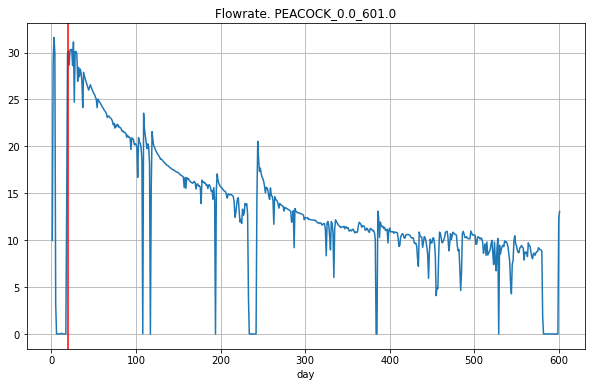

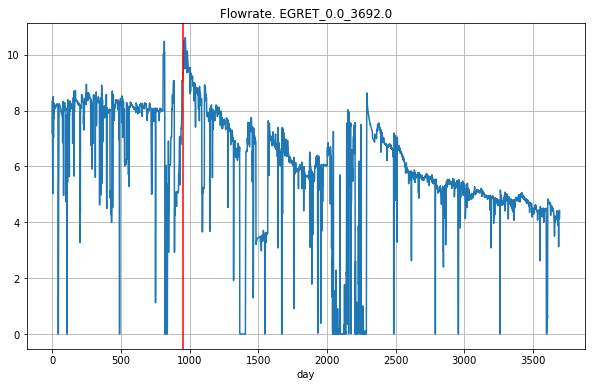

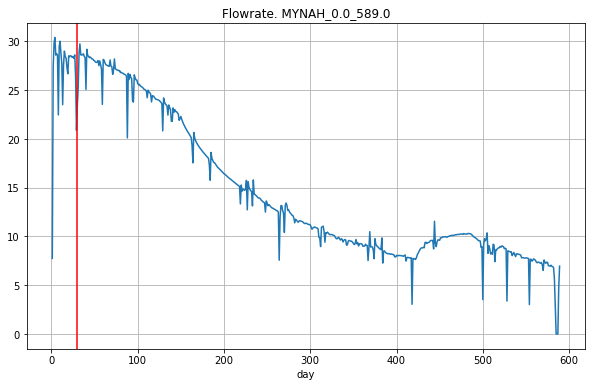

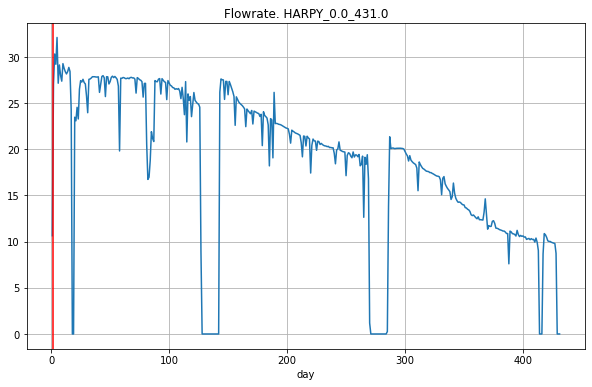

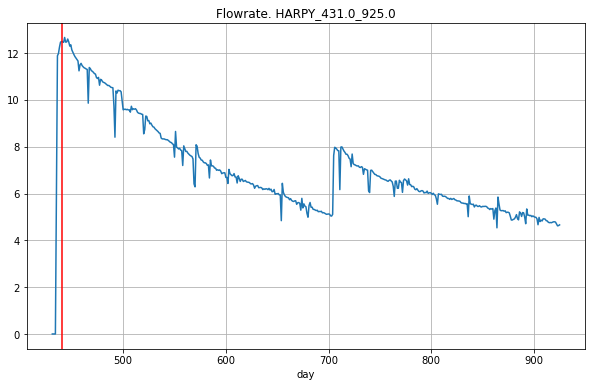

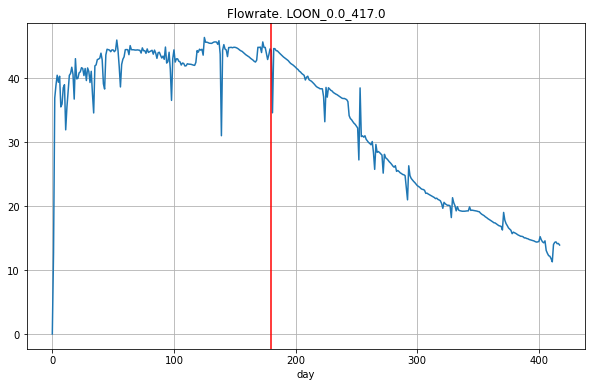

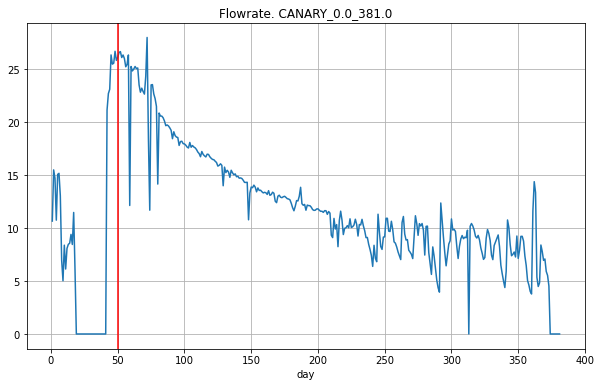

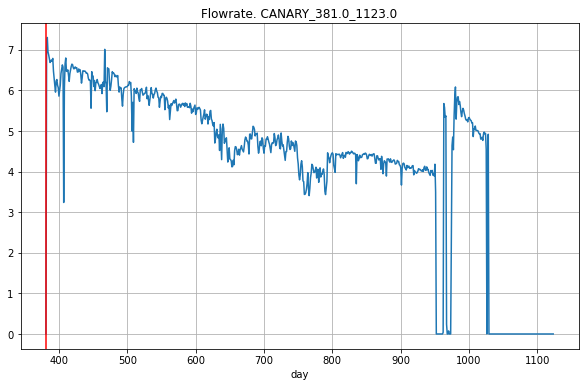

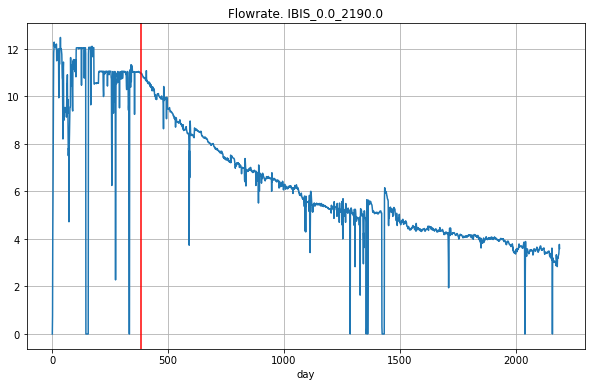

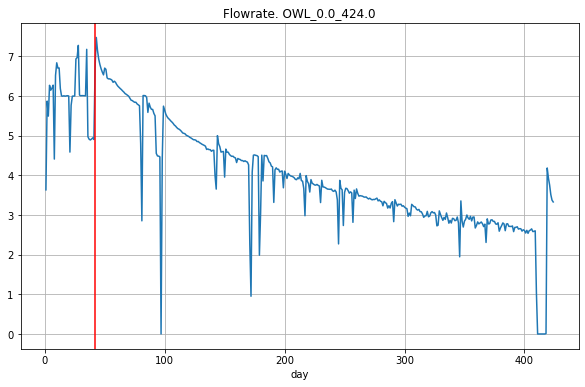

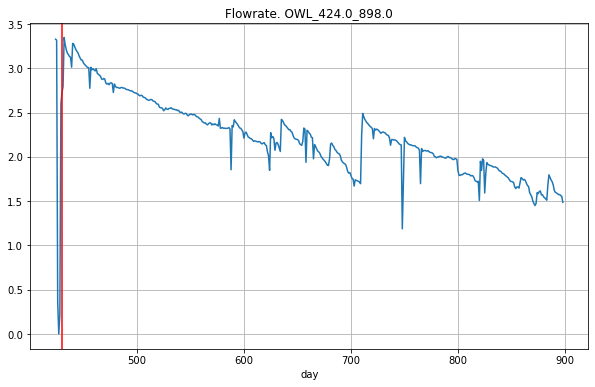

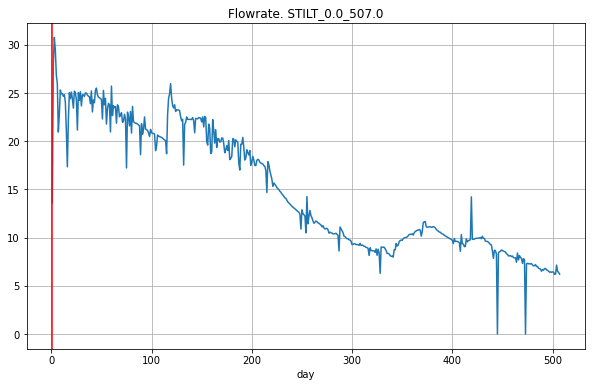

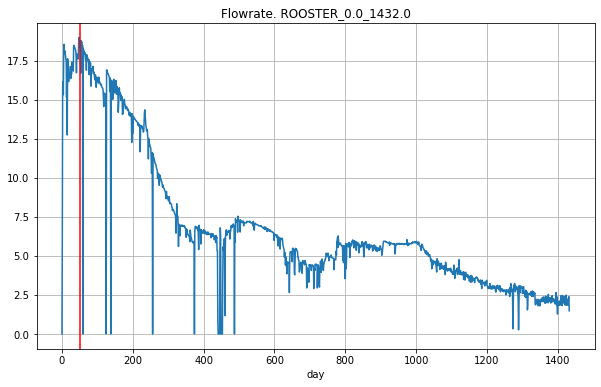

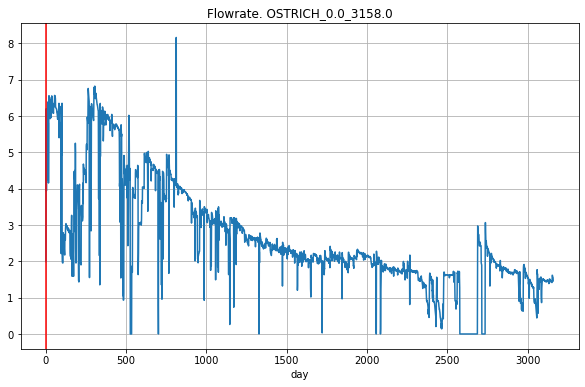

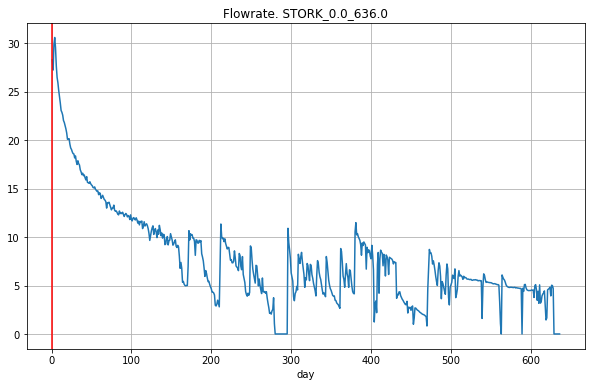

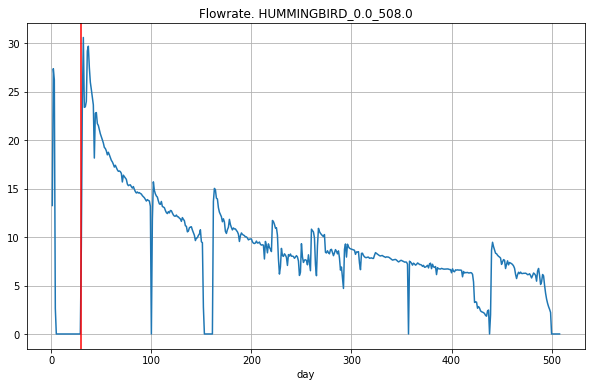

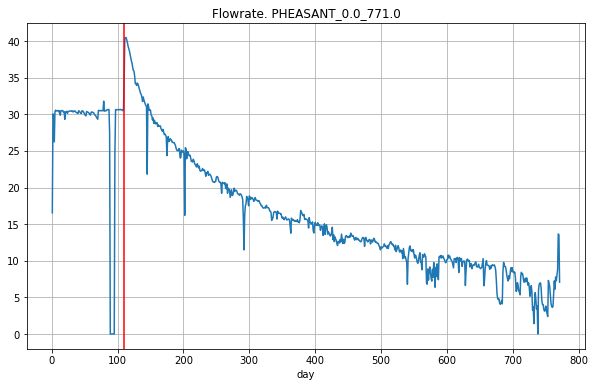

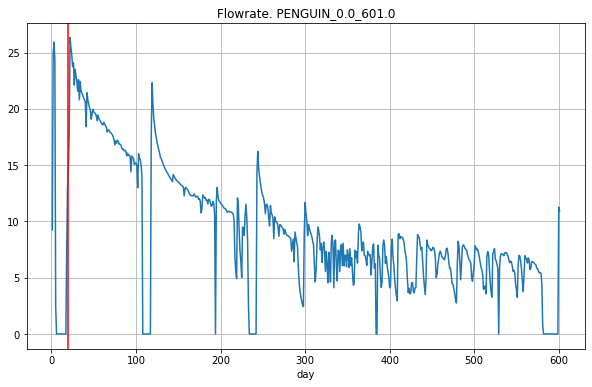

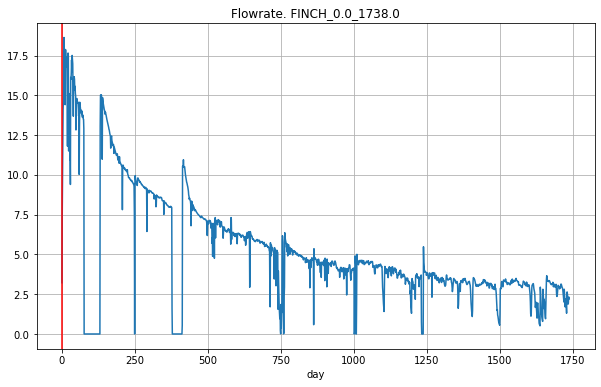

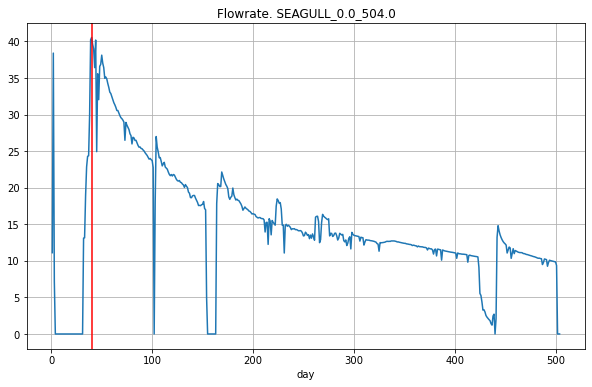

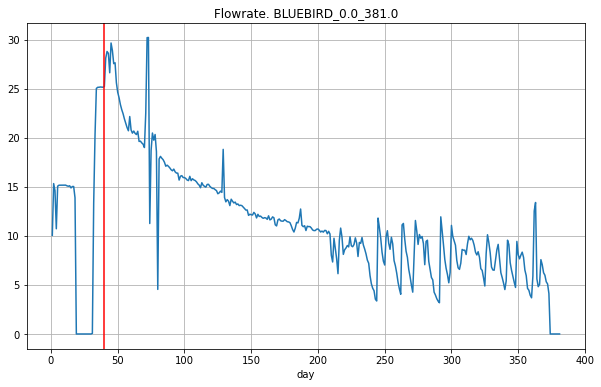

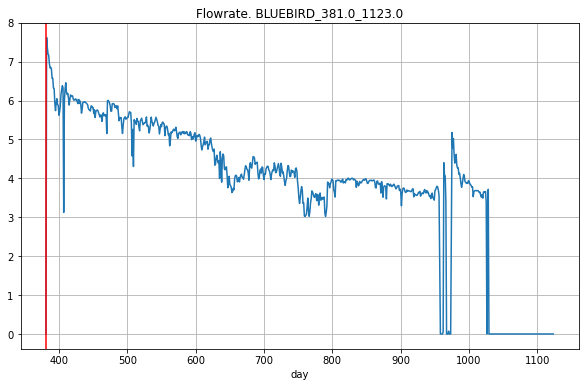

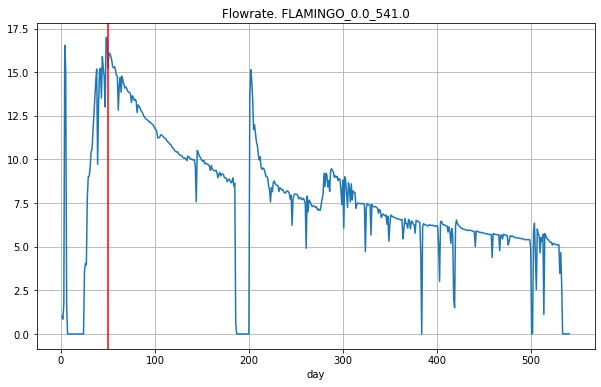

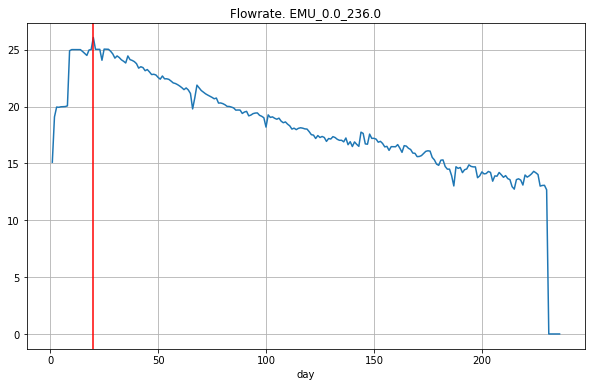

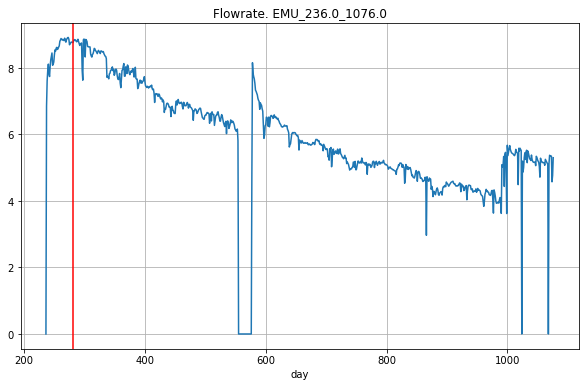

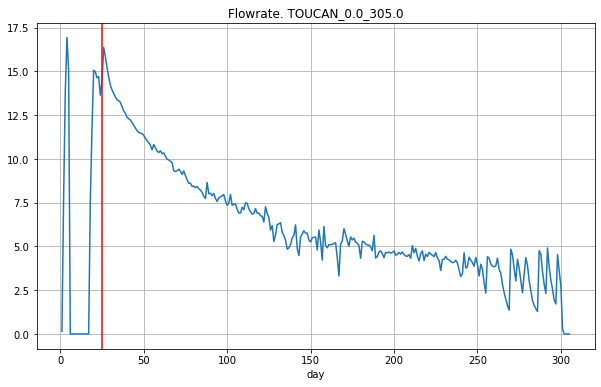

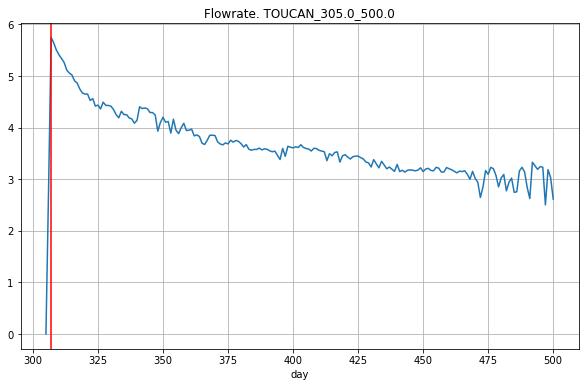

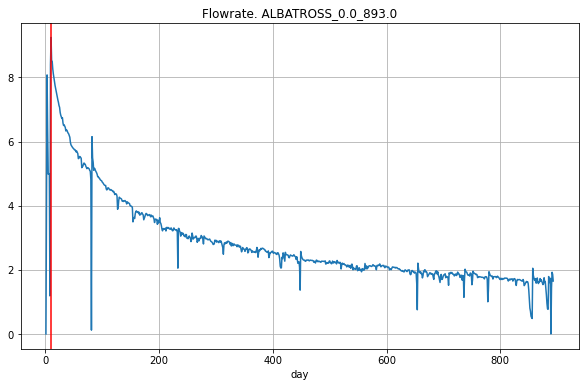

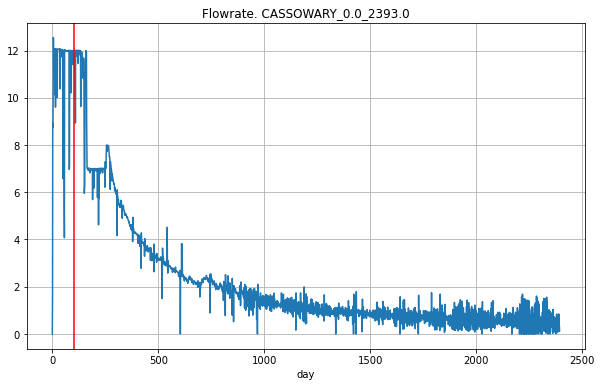

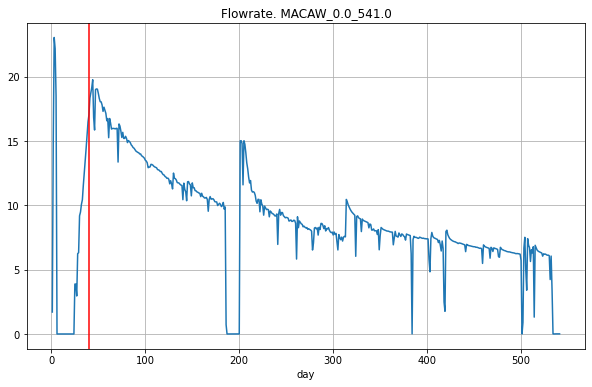

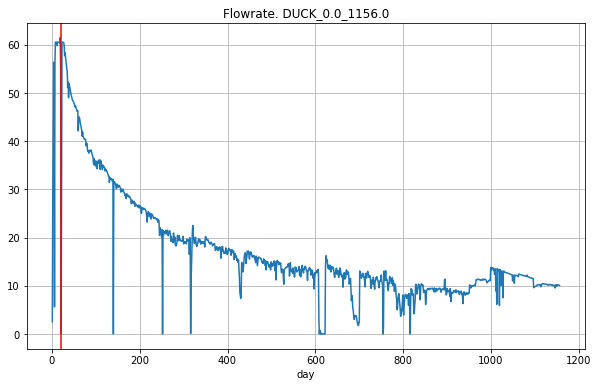

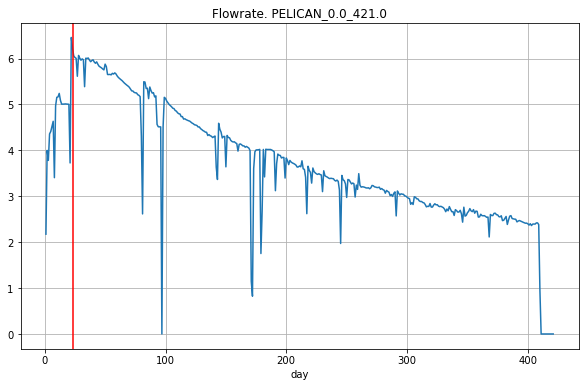

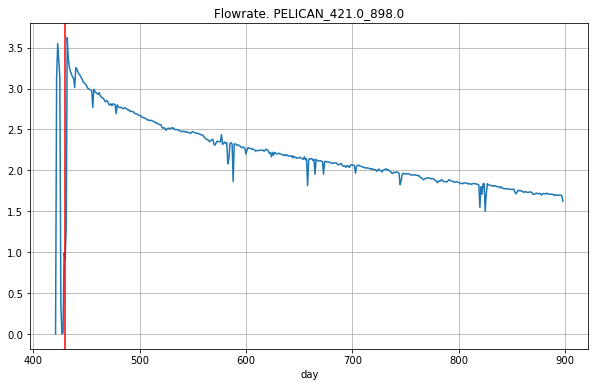

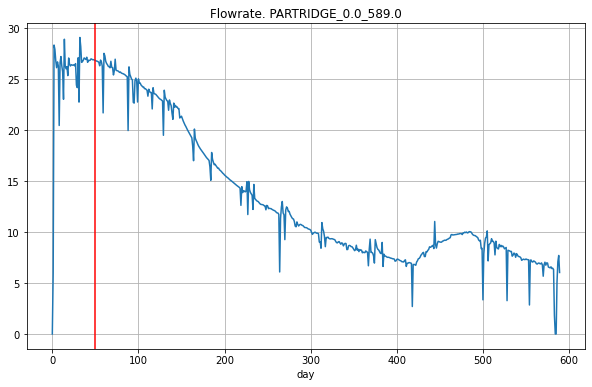

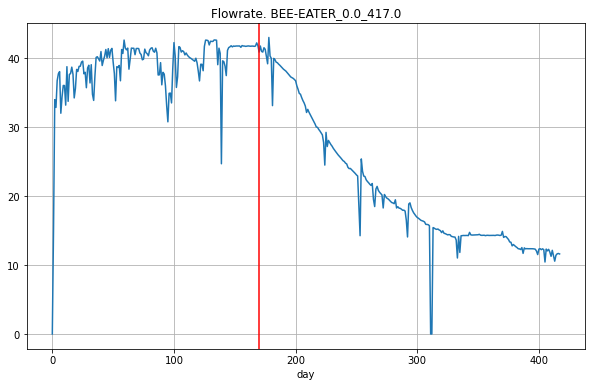

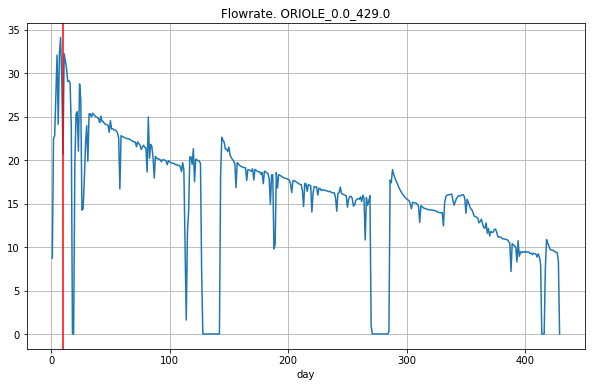

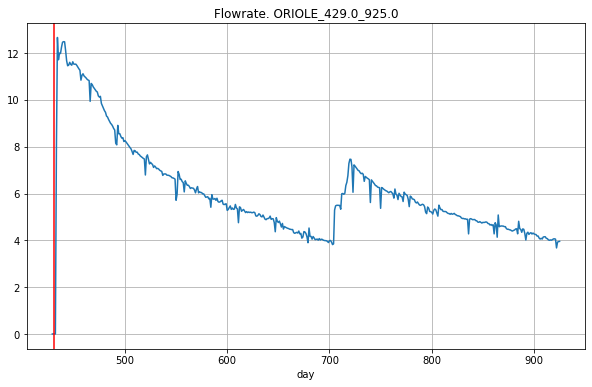

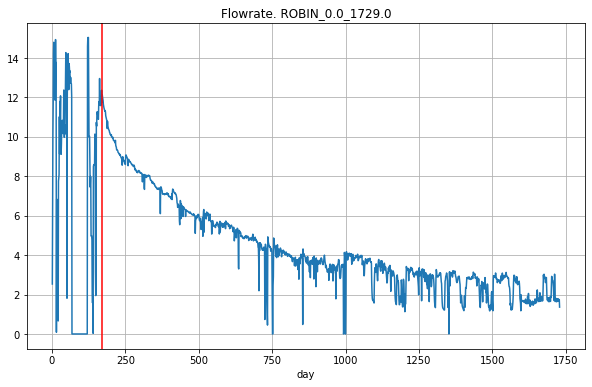

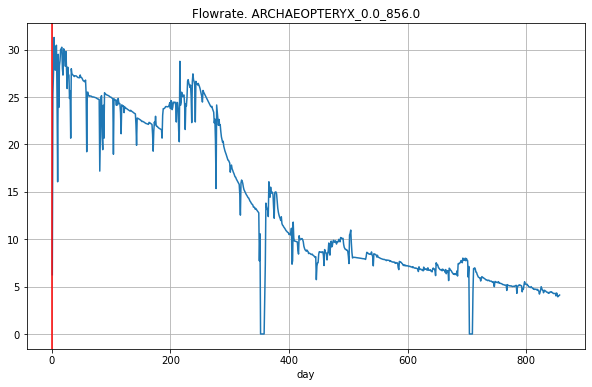

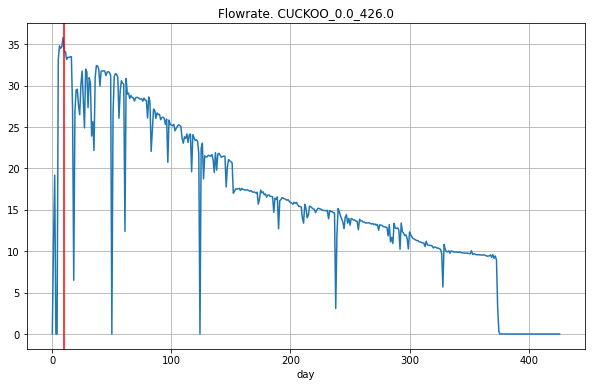

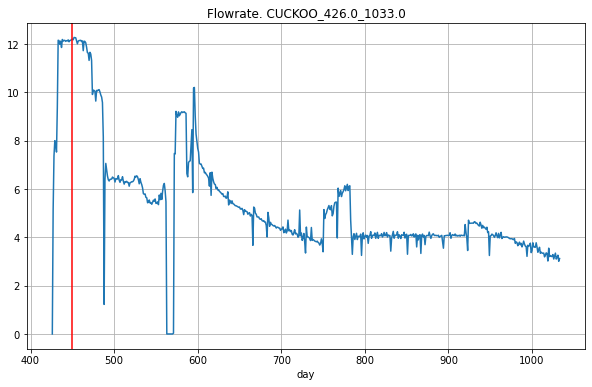

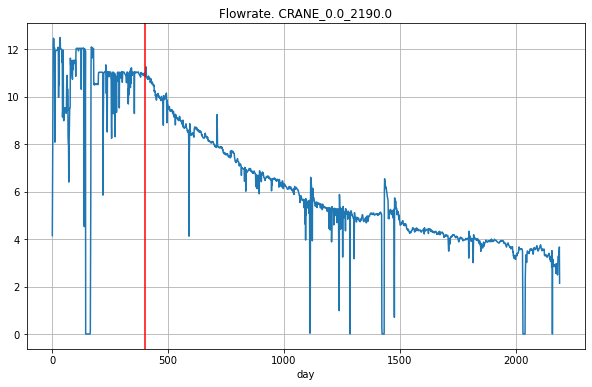

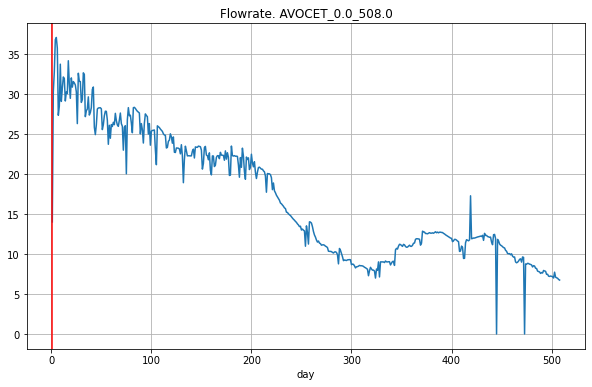

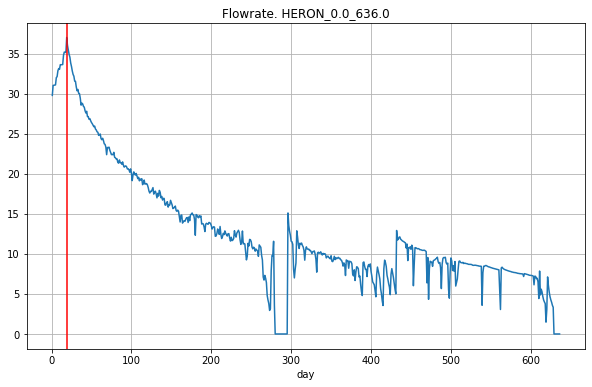

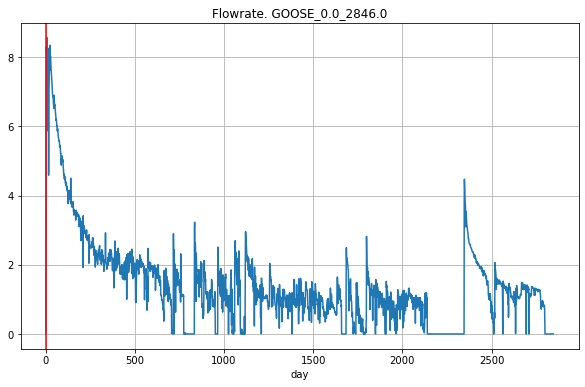

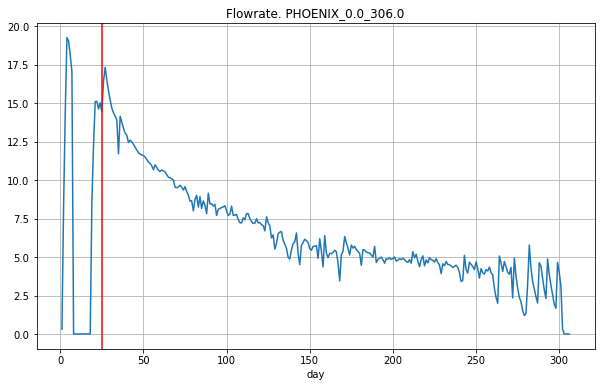

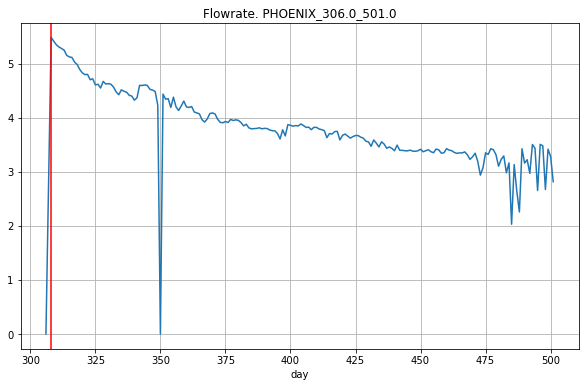

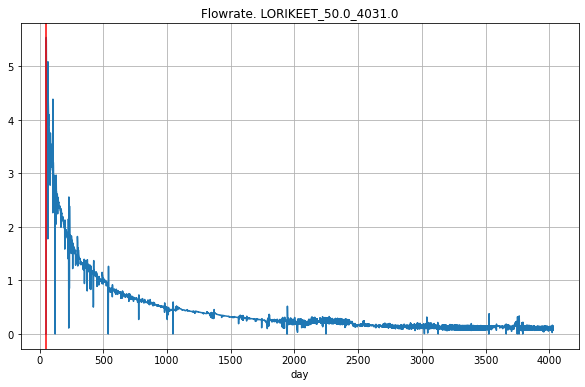

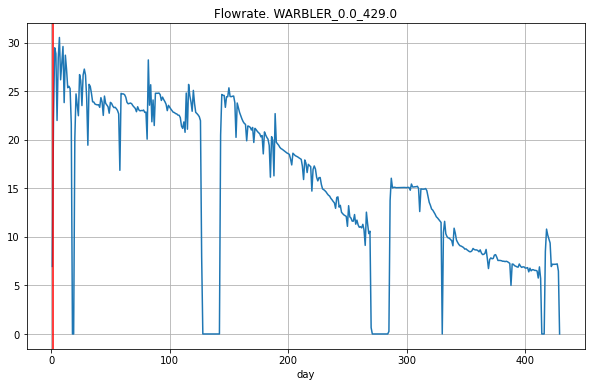

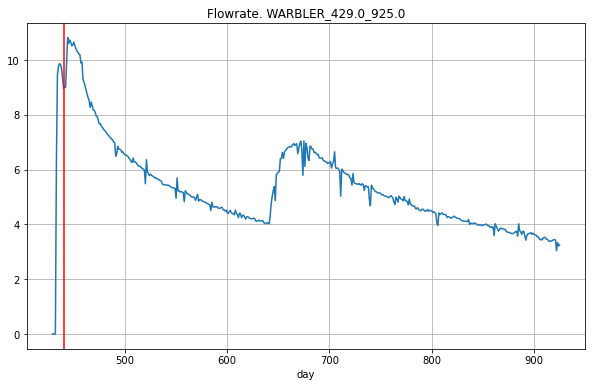

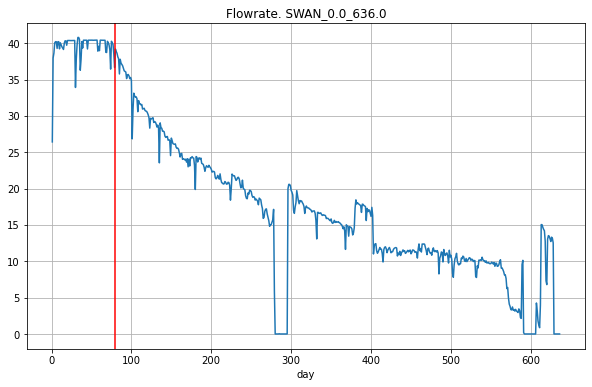

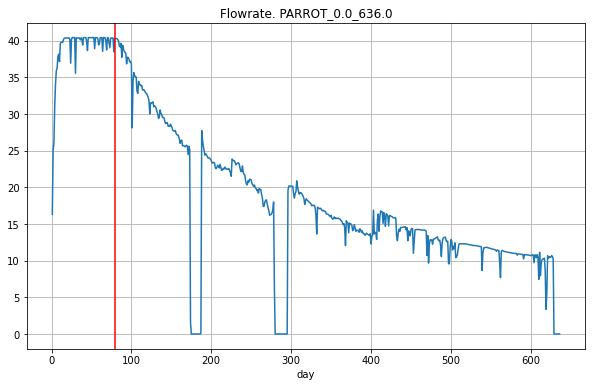

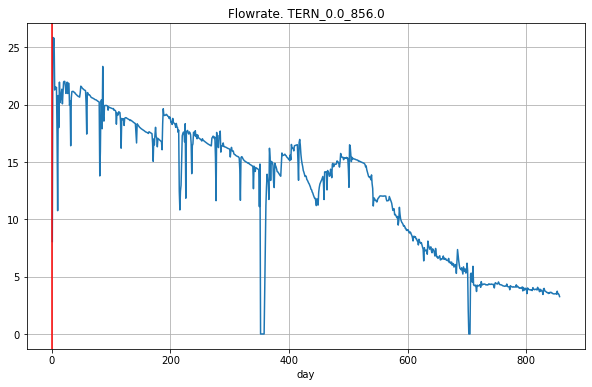

In [113]:
for period in periods:
    fig, ax = plt.subplots(figsize=(10,6))
    production_by_period.query('period == @period').plot.line('day',
                                                        'flowrate', 
                                                        legend=False,
                                                        ax=ax,
                                                        title='Flowrate. ' + period,
                                                       grid=True)
    ax.axvline(cutoff.loc[period, 'cutoff'], color='r')
    plt.show();

Заново собираю датафрейм без нестабильных участков. Удаляю периоды, продолжительность которых стала менее 100 дней.

In [114]:
df = pd.DataFrame(columns = production_by_period.columns); df

Empty DataFrame
Columns: [period, day, flowrate, Water Volume  (stb), Casing Pressure  (psi(a)), Tubing Pressure  (psi(a)), Active Pressure  (psi(a)), Line Pressure  (psi(a)), Pressure Source , Calculated Sandface Pressure  (psi(a))]
Index: []

In [115]:
for period in periods:
    cutoff_day = cutoff.loc[period, 'cutoff']
    temp = production_by_period\
        .copy()\
        .query('period == @period & day >= @cutoff_day')
    temp.day = temp.day - cutoff_day
    if temp.day.max() >= 100:
        df = pd.concat([df, temp], axis=0)

In [116]:
production_by_period = df.copy()

Проверяю

In [117]:
periods = production_by_period.period.unique()

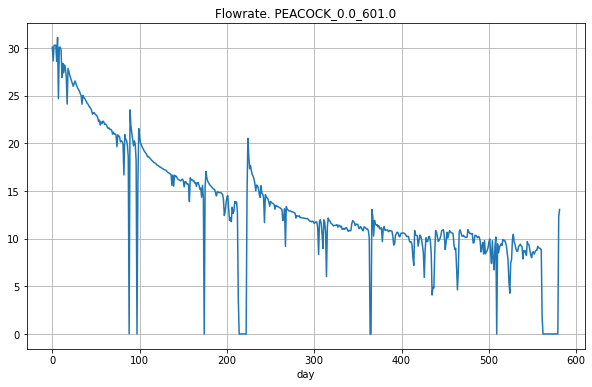

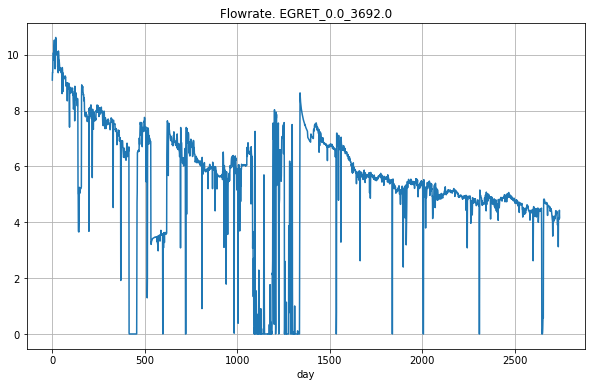

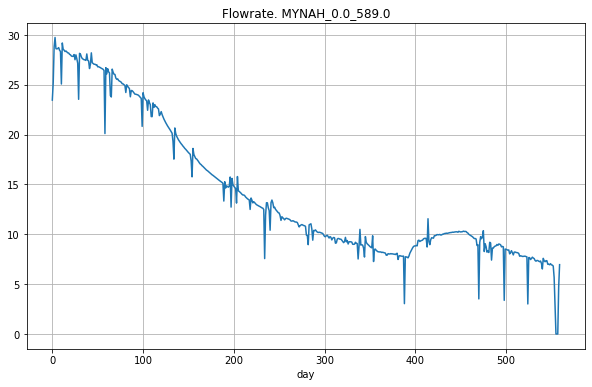

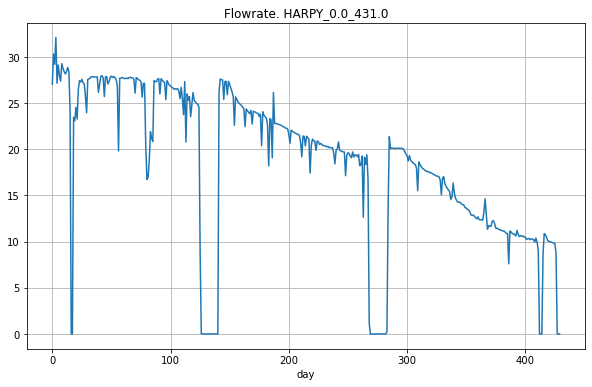

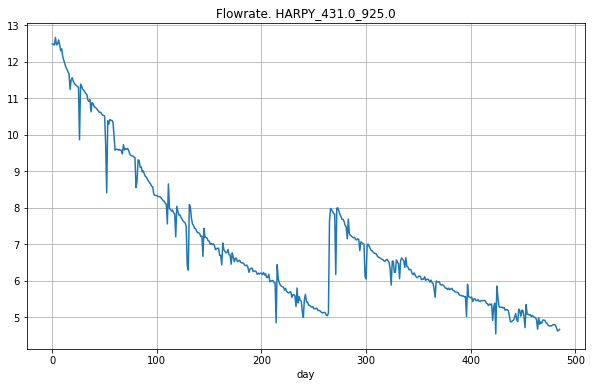

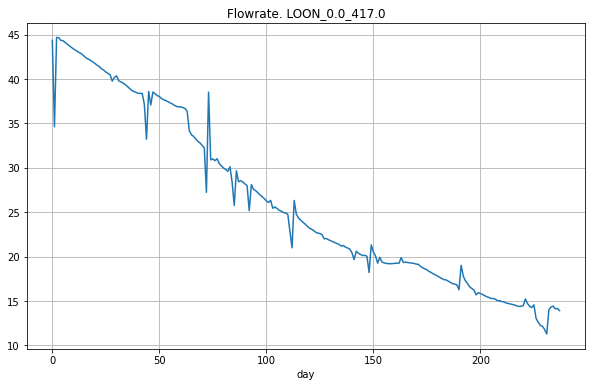

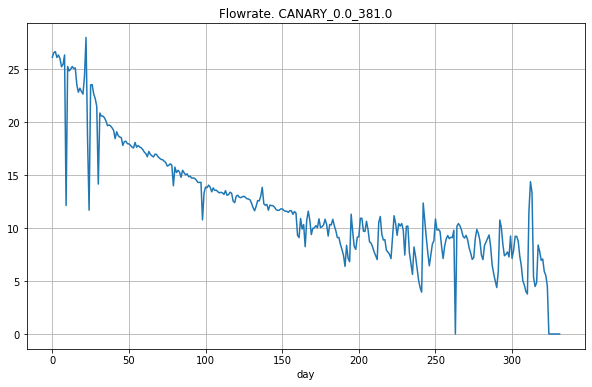

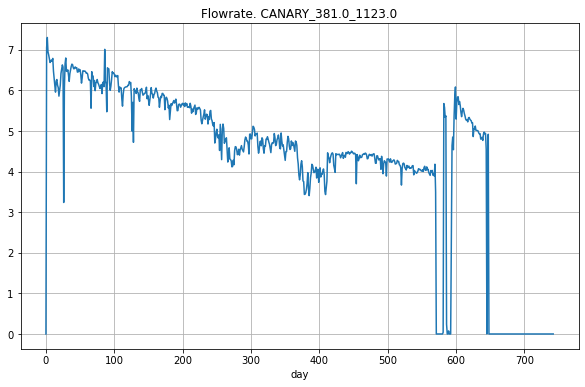

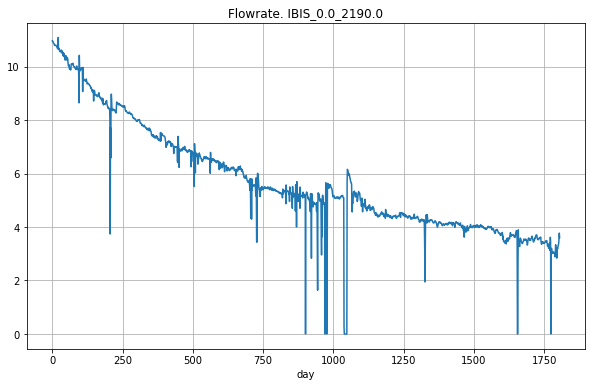

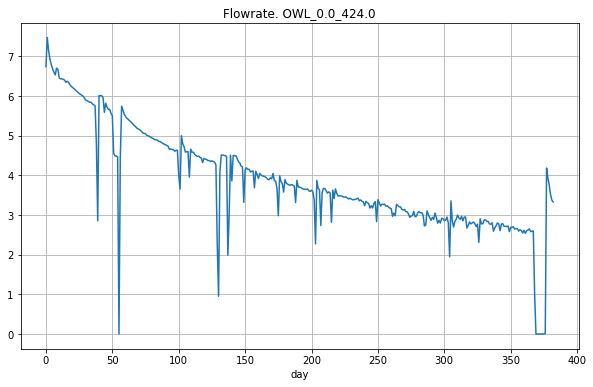

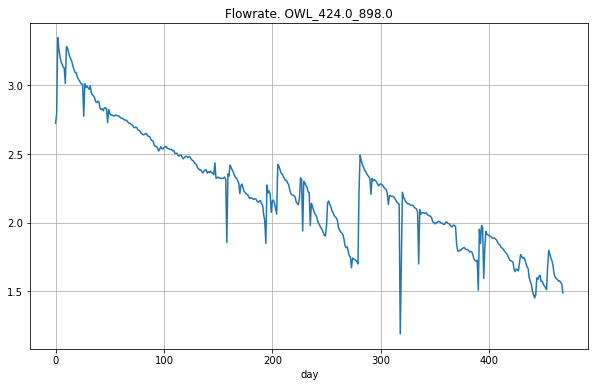

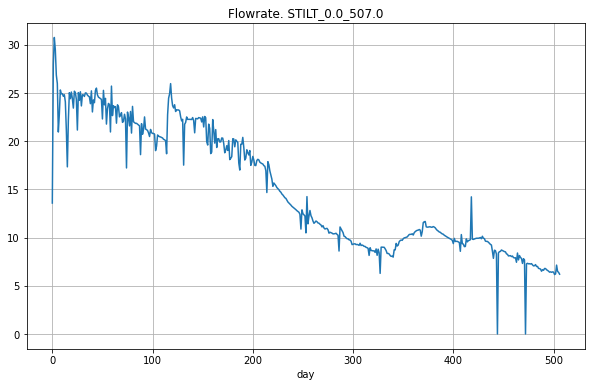

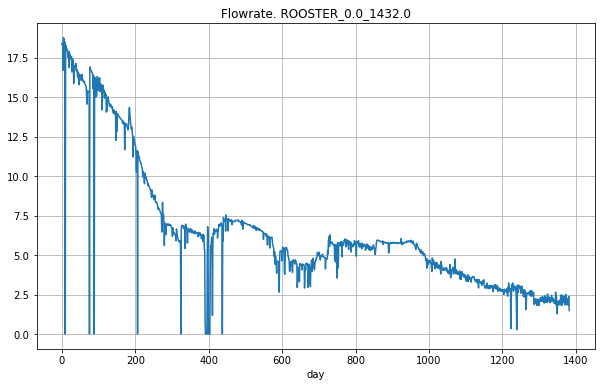

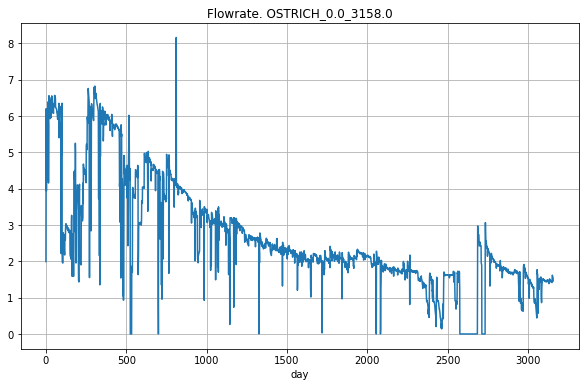

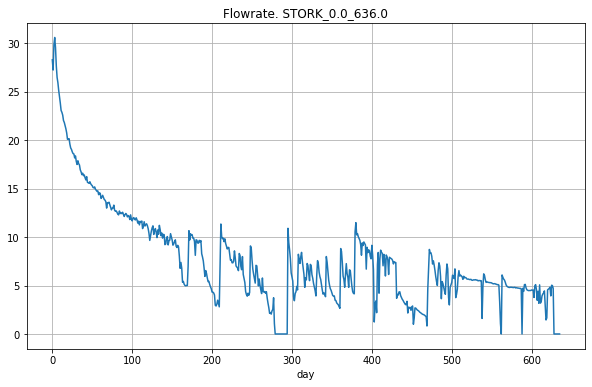

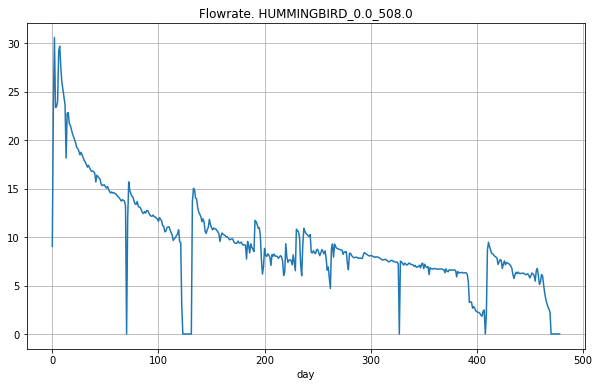

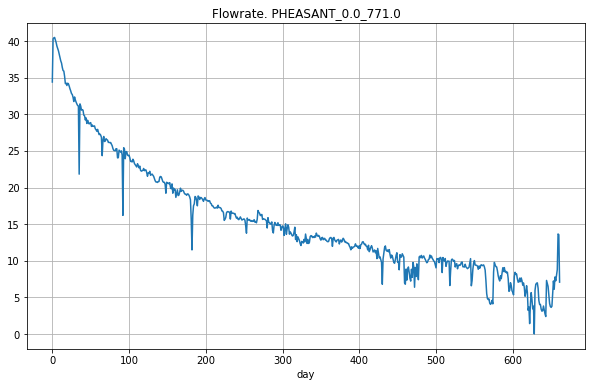

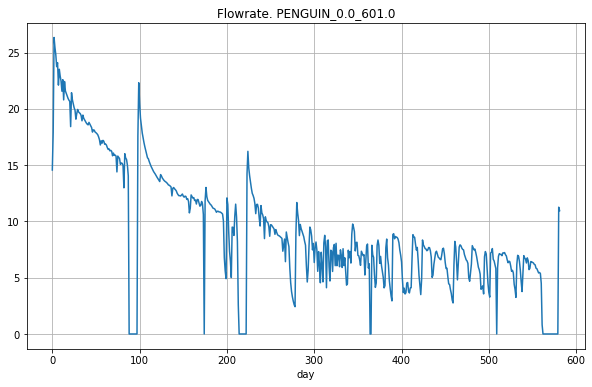

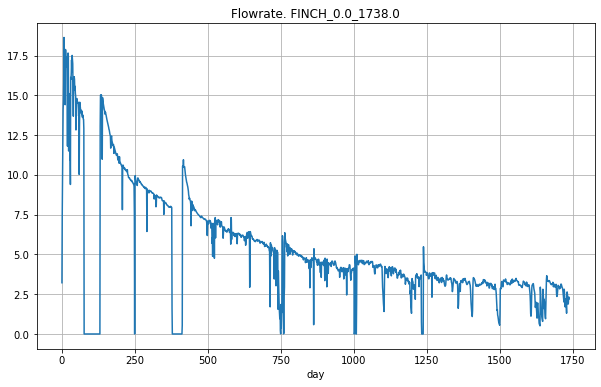

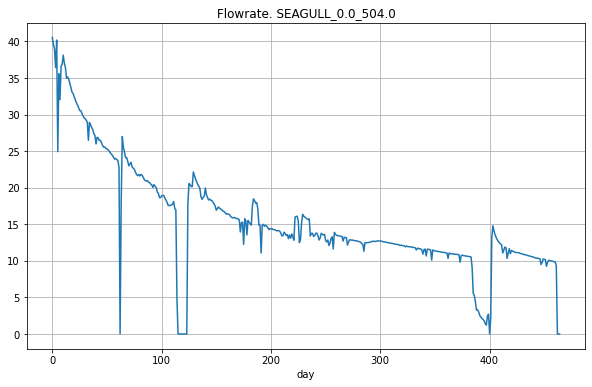

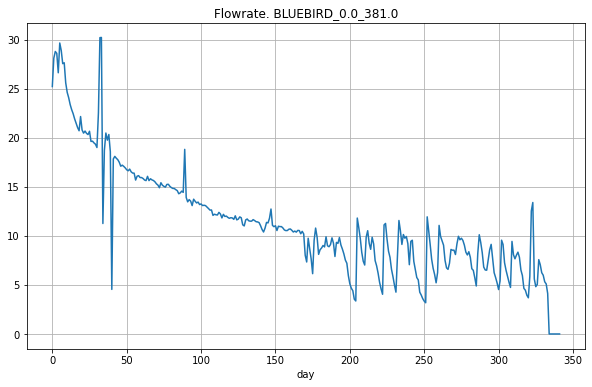

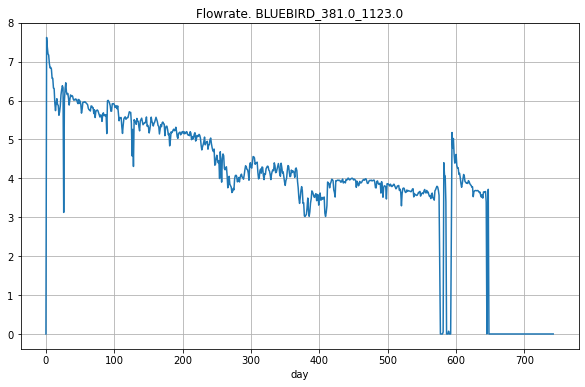

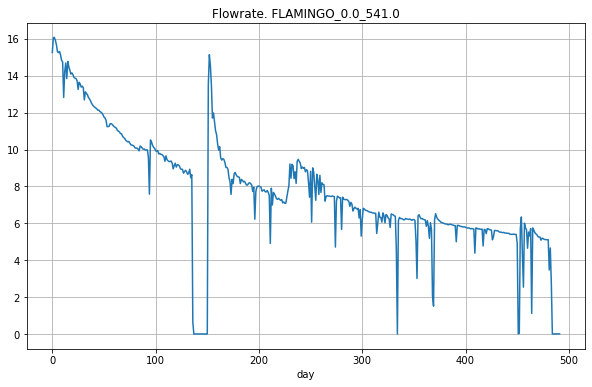

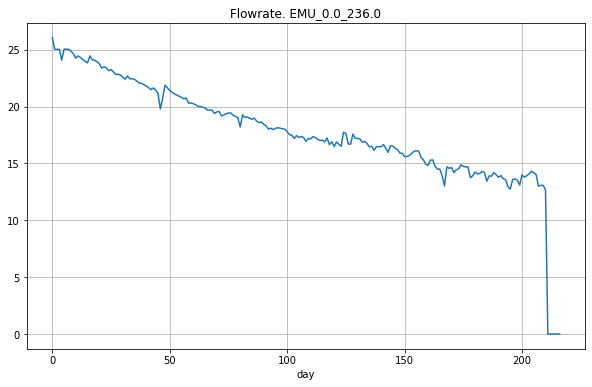

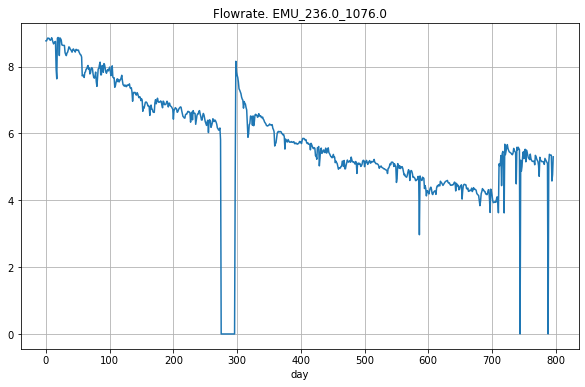

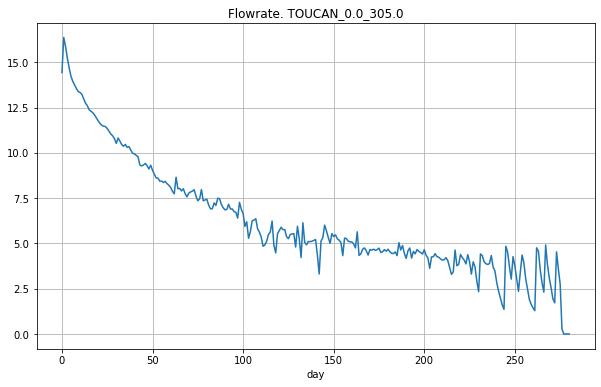

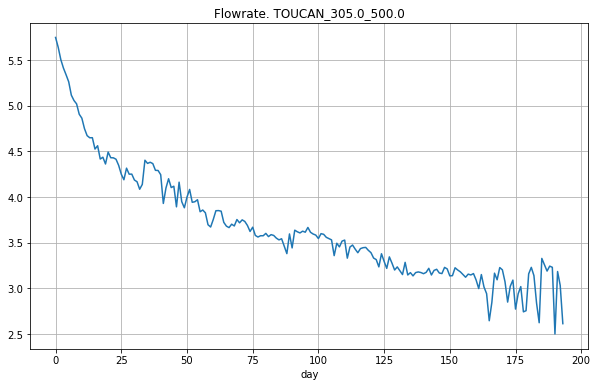

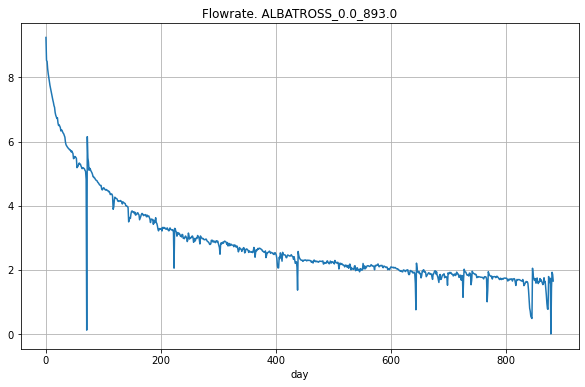

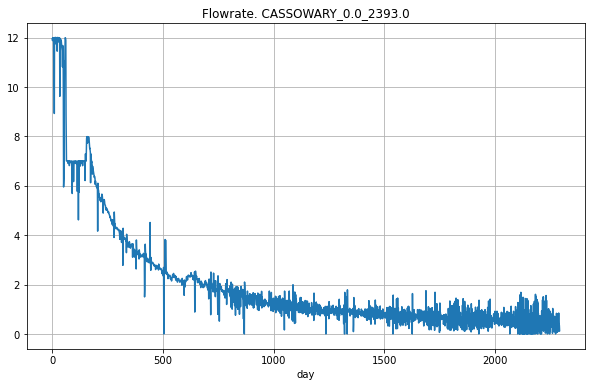

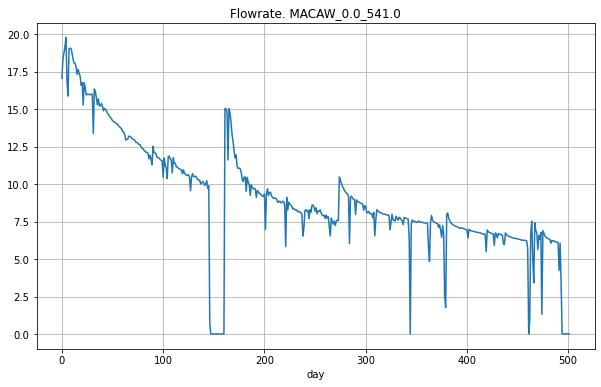

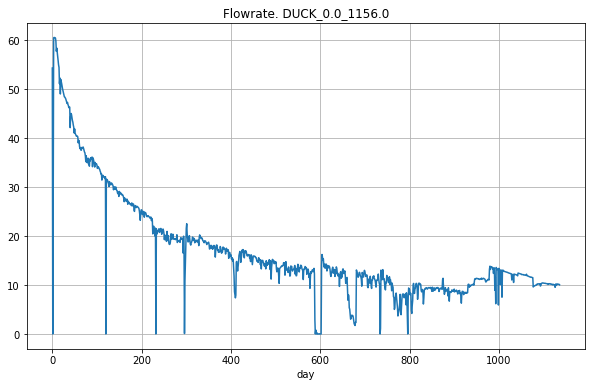

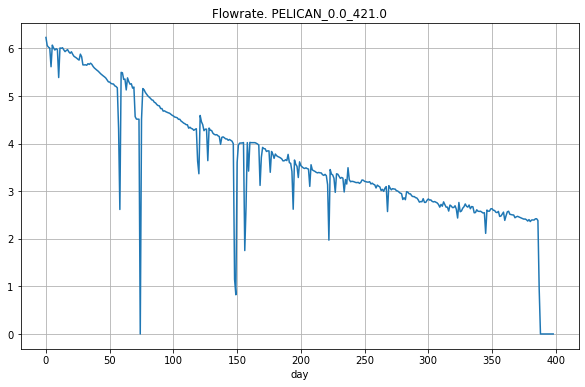

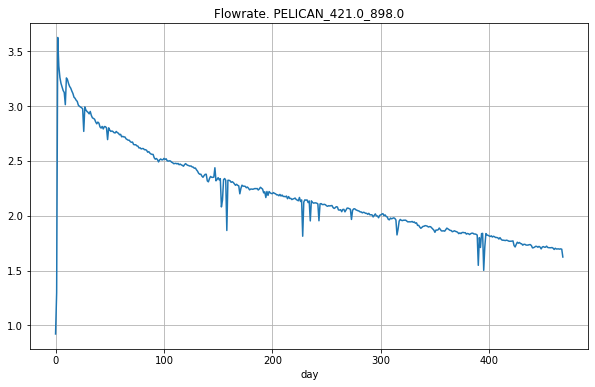

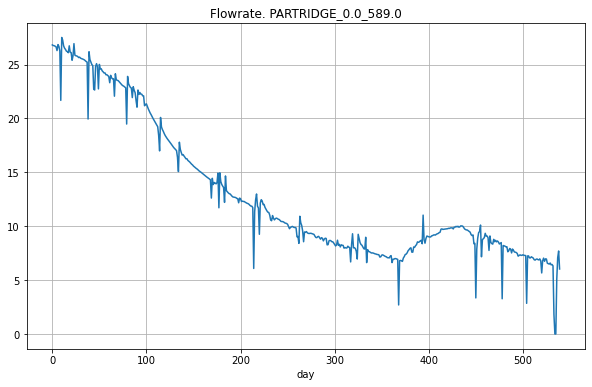

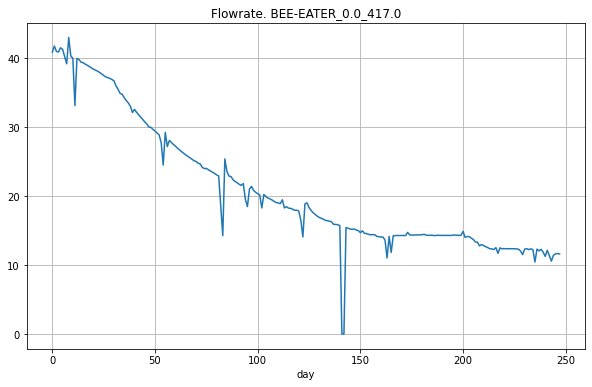

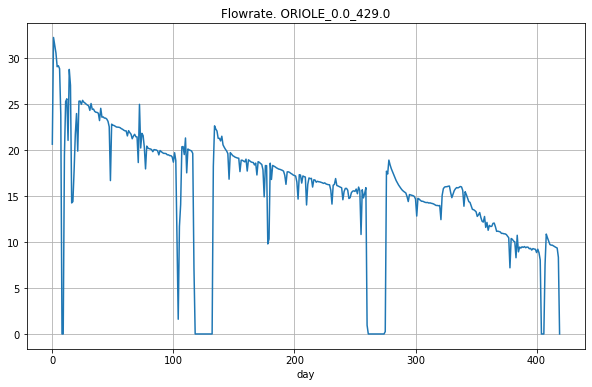

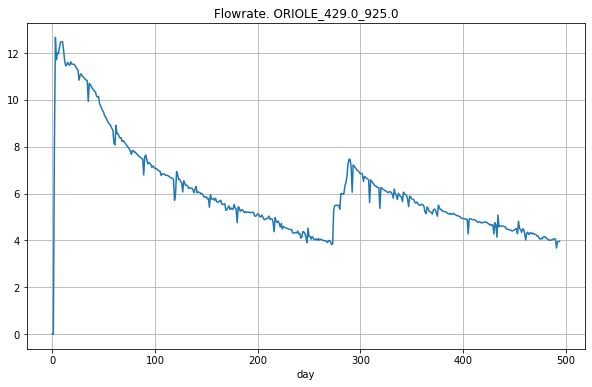

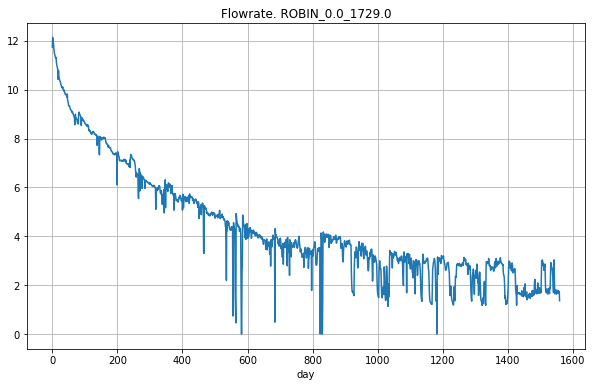

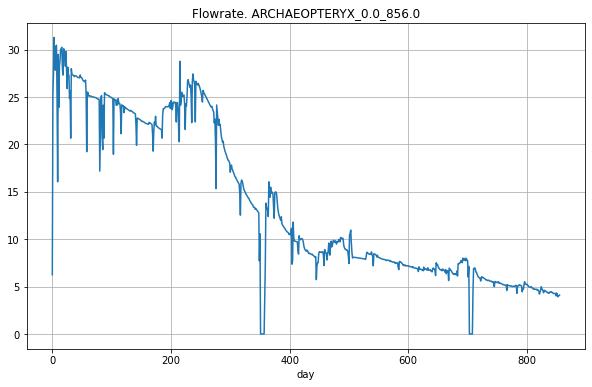

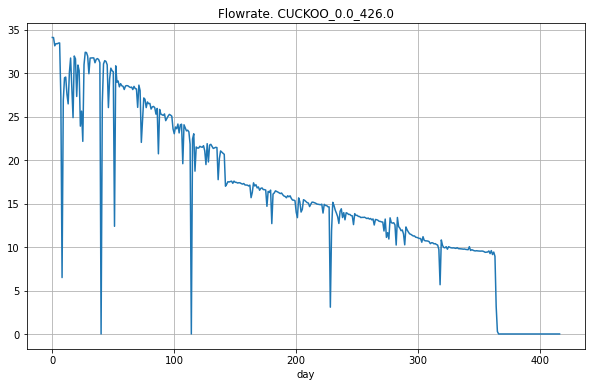

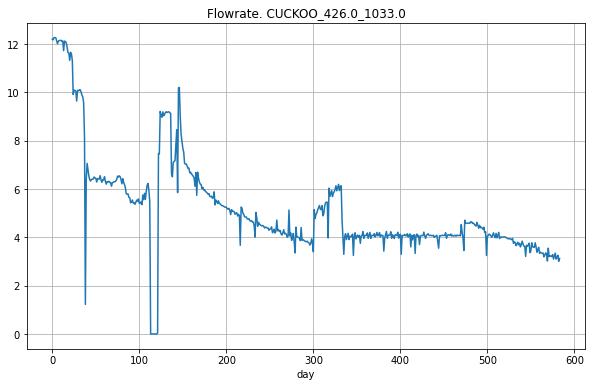

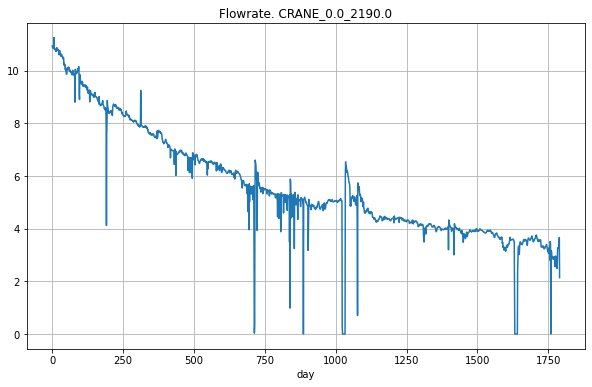

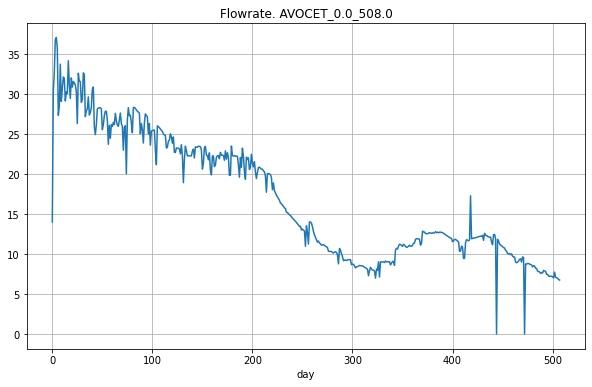

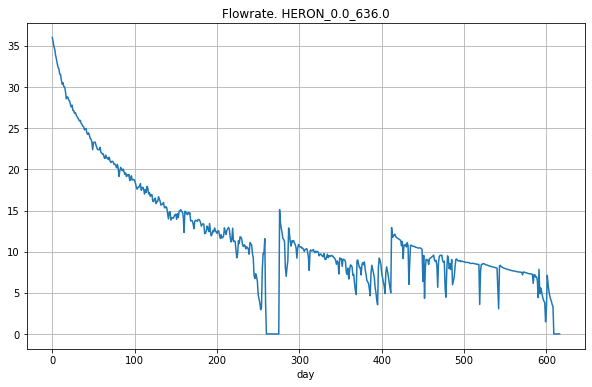

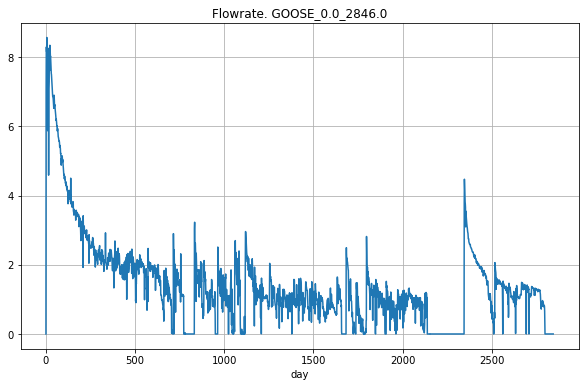

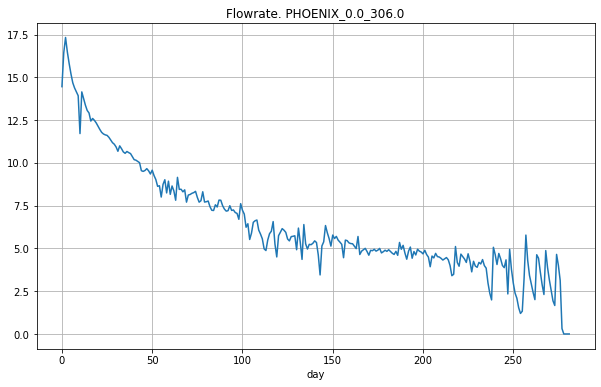

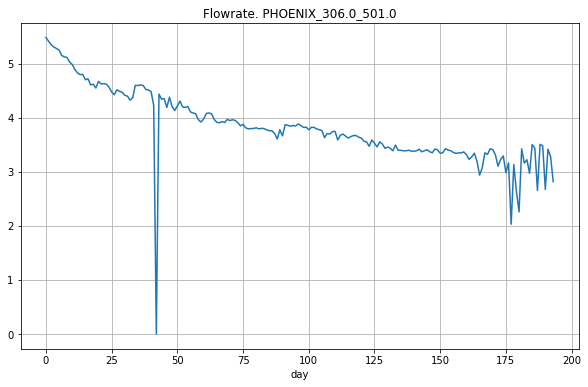

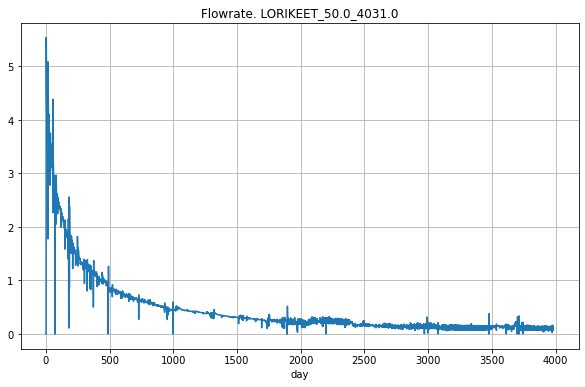

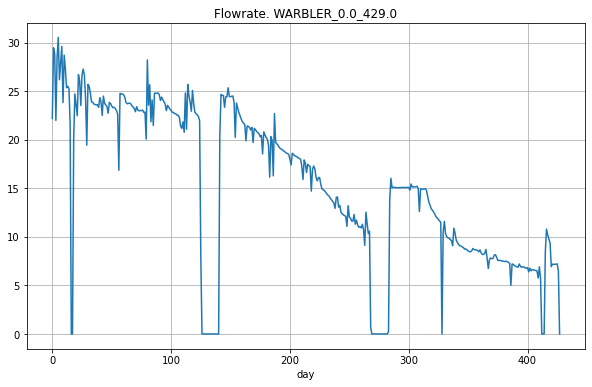

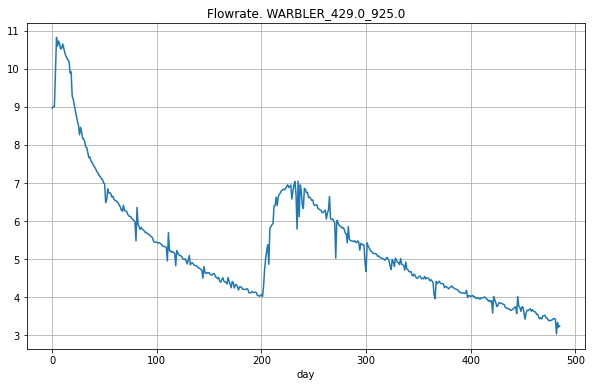

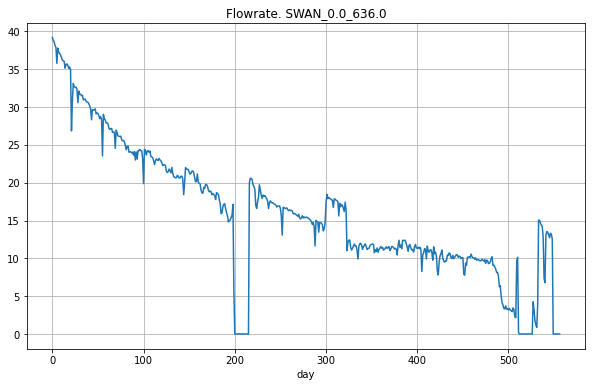

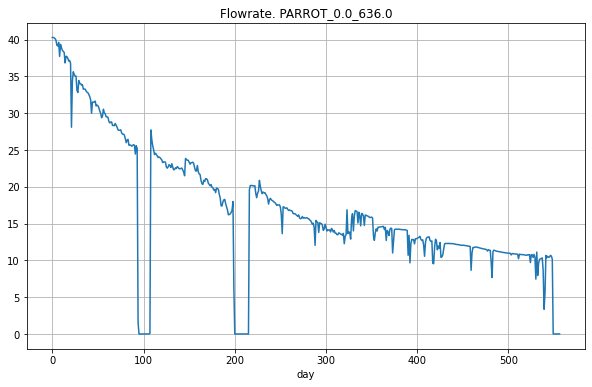

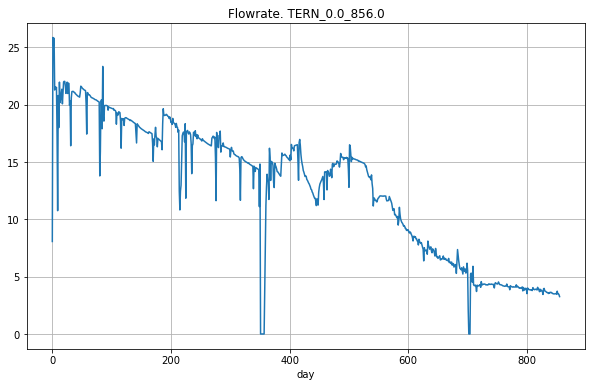

In [118]:
for period in periods:
    fig, ax = plt.subplots(figsize=(10,6))
    production_by_period.query('period == @period').plot.line('day',
                                                        'flowrate', 
                                                        legend=False,
                                                        ax=ax,
                                                        title='Flowrate. ' + period,
                                                       grid=True)
    plt.show();

In [119]:
production_by_period

period    day  flowrate  Water Volume  (stb)  \
PEACOCK  PEACOCK_0.0_601.0    0.0  30.11283                 0.00   
PEACOCK  PEACOCK_0.0_601.0    1.0  28.67052                 0.00   
PEACOCK  PEACOCK_0.0_601.0    2.0  30.29833                 0.00   
PEACOCK  PEACOCK_0.0_601.0    3.0  30.31478                 0.00   
PEACOCK  PEACOCK_0.0_601.0    4.0  30.31672                 0.00   
...                    ...    ...       ...                  ...   
TERN        TERN_0.0_856.0  851.0   3.73129               105.29   
TERN        TERN_0.0_856.0  852.0   3.50812                90.18   
TERN        TERN_0.0_856.0  853.0   3.51034                88.43   
TERN        TERN_0.0_856.0  854.0   3.42901                87.27   
TERN        TERN_0.0_856.0  855.0   3.26027                78.26   

         Casing Pressure  (psi(a))  Tubing Pressure  (psi(a))  \
PEACOCK                   1936.670                      0.000   
PEACOCK                   1836.670                      0.000   
PEACOCK                   1729.810                      0.000   
PEACOCK                   1649.980                      0.000   
PEACOCK                   1565.330                      0.000   
...                            ...                        ...   
TERN                      1825.550                   1218.784   
TERN                      1822.682                   1143.546   
TERN                      1827.862                   1181.910   
TERN                      1828.626                   1172.560   
TERN                      1877.503                   1301.665   

         Active Pressure  (psi(a))  Line Pressure  (psi(a)) Pressure Source   \
PEACOCK                   1936.670                  835.000  Casing Pressure   
PEACOCK                   1836.670                  827.000  Casing Pressure   
PEACOCK                   1729.810                  824.000  Casing Pressure   
PEACOCK                   1649.980                  857.000  Casing Pressure   
PEACOCK                   1565.330                  875.000  Casing Pressure   
...                            ...                      ...              ...   
TERN                      1825.550                 1080.109  Casing Pressure   
TERN                      1822.682                 1149.639  Casing Pressure   
TERN                      1827.862                 1122.958  Casing Pressure   
TERN                      1828.626                 1157.842  Casing Pressure   
TERN                      1877.503                 1148.562  Casing Pressure   

         Calculated Sandface Pressure  (psi(a))  
PEACOCK                             2409.979045  
PEACOCK                             2285.252840  
PEACOCK                             2172.269711  
PEACOCK                             2080.750854  
PEACOCK                             1984.125167  
...                                         ...  
TERN                                2667.856515  
TERN                                2670.438767  
TERN                                2675.300498  
TERN                                2682.941509  
TERN                                2754.352999  

[45353 rows x 10 columns]

In [120]:
production_by_period['Pressure Source '].value_counts()

Tubing Pressure    29256
Casing Pressure    16097
Name: Pressure Source , dtype: int64

In [121]:
production_by_period = pd.get_dummies(production_by_period, columns=['Pressure Source '],
                                      drop_first=True)

In [122]:
production_by_period.groupby('period').agg({'Pressure Source _Tubing Pressure': 'nunique'})

Pressure Source _Tubing Pressure
period                                                   
ALBATROSS_0.0_893.0                                     1
ARCHAEOPTERYX_0.0_856.0                                 1
AVOCET_0.0_508.0                                        1
BEE-EATER_0.0_417.0                                     1
BLUEBIRD_0.0_381.0                                      1
BLUEBIRD_381.0_1123.0                                   2
CANARY_0.0_381.0                                        1
CANARY_381.0_1123.0                                     2
CASSOWARY_0.0_2393.0                                    1
CRANE_0.0_2190.0                                        1
CUCKOO_0.0_426.0                                        1
CUCKOO_426.0_1033.0                                     1
DUCK_0.0_1156.0                                         1
EGRET_0.0_3692.0                                        1
EMU_0.0_236.0                                           1
EMU_236.0_1076.0                                        1
FINCH_0.0_1738.0                                        1
FLAMINGO_0.0_541.0                                      1
GOOSE_0.0_2846.0                                        1
HARPY_0.0_431.0                                         1
HARPY_431.0_925.0                                       1
HERON_0.0_636.0                                         1
HUMMINGBIRD_0.0_508.0                                   1
IBIS_0.0_2190.0                                         1
LOON_0.0_417.0                                          1
LORIKEET_50.0_4031.0                                    2
MACAW_0.0_541.0                                         1
MYNAH_0.0_589.0                                         1
ORIOLE_0.0_429.0                                        1
ORIOLE_429.0_925.0                                      2
OSTRICH_0.0_3158.0                                      1
OWL_0.0_424.0                                           1
OWL_424.0_898.0                                         1
PARROT_0.0_636.0                                        1
PARTRIDGE_0.0_589.0                                     1
PEACOCK_0.0_601.0                                       1
PELICAN_0.0_421.0                                       1
PELICAN_421.0_898.0                                     1
PENGUIN_0.0_601.0                                       1
PHEASANT_0.0_771.0                                      1
PHOENIX_0.0_306.0                                       1
PHOENIX_306.0_501.0                                     1
ROBIN_0.0_1729.0                                        1
ROOSTER_0.0_1432.0                                      1
SEAGULL_0.0_504.0                                       1
STILT_0.0_507.0                                         1
STORK_0.0_636.0                                         1
SWAN_0.0_636.0                                          1
TERN_0.0_856.0                                          1
TOUCAN_0.0_305.0                                        1
TOUCAN_305.0_500.0                                      1
WARBLER_0.0_429.0                                       1
WARBLER_429.0_925.0                                     1

В отличие от нефти значение этого параметра может меняться.

# Нормализация
Обычная нормализация (вычитание среднего и деление на стандартное отклонение) может исказить соотношение между связанными величинами, например, давление в разных точках, поэтому вместо этого меняю единицы измерения.

In [123]:
production_by_period

period    day  flowrate  Water Volume  (stb)  \
PEACOCK  PEACOCK_0.0_601.0    0.0  30.11283                 0.00   
PEACOCK  PEACOCK_0.0_601.0    1.0  28.67052                 0.00   
PEACOCK  PEACOCK_0.0_601.0    2.0  30.29833                 0.00   
PEACOCK  PEACOCK_0.0_601.0    3.0  30.31478                 0.00   
PEACOCK  PEACOCK_0.0_601.0    4.0  30.31672                 0.00   
...                    ...    ...       ...                  ...   
TERN        TERN_0.0_856.0  851.0   3.73129               105.29   
TERN        TERN_0.0_856.0  852.0   3.50812                90.18   
TERN        TERN_0.0_856.0  853.0   3.51034                88.43   
TERN        TERN_0.0_856.0  854.0   3.42901                87.27   
TERN        TERN_0.0_856.0  855.0   3.26027                78.26   

         Casing Pressure  (psi(a))  Tubing Pressure  (psi(a))  \
PEACOCK                   1936.670                      0.000   
PEACOCK                   1836.670                      0.000   
PEACOCK                   1729.810                      0.000   
PEACOCK                   1649.980                      0.000   
PEACOCK                   1565.330                      0.000   
...                            ...                        ...   
TERN                      1825.550                   1218.784   
TERN                      1822.682                   1143.546   
TERN                      1827.862                   1181.910   
TERN                      1828.626                   1172.560   
TERN                      1877.503                   1301.665   

         Active Pressure  (psi(a))  Line Pressure  (psi(a))  \
PEACOCK                   1936.670                  835.000   
PEACOCK                   1836.670                  827.000   
PEACOCK                   1729.810                  824.000   
PEACOCK                   1649.980                  857.000   
PEACOCK                   1565.330                  875.000   
...                            ...                      ...   
TERN                      1825.550                 1080.109   
TERN                      1822.682                 1149.639   
TERN                      1827.862                 1122.958   
TERN                      1828.626                 1157.842   
TERN                      1877.503                 1148.562   

         Calculated Sandface Pressure  (psi(a))  \
PEACOCK                             2409.979045   
PEACOCK                             2285.252840   
PEACOCK                             2172.269711   
PEACOCK                             2080.750854   
PEACOCK                             1984.125167   
...                                         ...   
TERN                                2667.856515   
TERN                                2670.438767   
TERN                                2675.300498   
TERN                                2682.941509   
TERN                                2754.352999   

         Pressure Source _Tubing Pressure  
PEACOCK                                 0  
PEACOCK                                 0  
PEACOCK                                 0  
PEACOCK                                 0  
PEACOCK                                 0  
...                                   ...  
TERN                                    0  
TERN                                    0  
TERN                                    0  
TERN                                    0  
TERN                                    0  

[45353 rows x 10 columns]

In [124]:
production_by_period.columns.to_list()

['period',
 'day',
 'flowrate',
 'Water Volume  (stb)',
 'Casing Pressure  (psi(a))',
 'Tubing Pressure  (psi(a))',
 'Active Pressure  (psi(a))',
 'Line Pressure  (psi(a))',
 'Calculated Sandface Pressure  (psi(a))',
 'Pressure Source _Tubing Pressure']

In [125]:
production_by_period.max()

period                                    WARBLER_429.0_925.0
day                                                    3981.0
flowrate                                             60.59262
Water Volume  (stb)                                    2159.4
Casing Pressure  (psi(a))                            10239.18
Tubing Pressure  (psi(a))                             7004.89
Active Pressure  (psi(a))                             8700.18
Line Pressure  (psi(a))                              1299.919
Calculated Sandface Pressure  (psi(a))           10608.701221
Pressure Source _Tubing Pressure                            1
dtype: object

In [126]:
production_by_period[['Casing_Pressure_ksia',
                 'Tubing_Pressure_ksia',
                 'Active_Pressure_ksia',
                 'Line_Pressure_ksia',
                 'Calculated_Sandface_Pressure_ksia',
                'water_thousand_bbl']] = production_by_period[['Casing Pressure  (psi(a))',
                                                         'Tubing Pressure  (psi(a))',
                                                         'Active Pressure  (psi(a))',
                                                         'Line Pressure  (psi(a))',
                                                         'Calculated Sandface Pressure  (psi(a))',
                                                         'Water Volume  (stb)']] / 1000

In [127]:
production_by_period.drop(columns = ['Casing Pressure  (psi(a))',
                         'Tubing Pressure  (psi(a))',
                         'Active Pressure  (psi(a))',
                         'Line Pressure  (psi(a))',
                         'Calculated Sandface Pressure  (psi(a))',
                    'Water Volume  (stb)'], inplace=True)

In [128]:
production_by_period

period    day  flowrate  Pressure Source _Tubing Pressure  \
PEACOCK  PEACOCK_0.0_601.0    0.0  30.11283                                 0   
PEACOCK  PEACOCK_0.0_601.0    1.0  28.67052                                 0   
PEACOCK  PEACOCK_0.0_601.0    2.0  30.29833                                 0   
PEACOCK  PEACOCK_0.0_601.0    3.0  30.31478                                 0   
PEACOCK  PEACOCK_0.0_601.0    4.0  30.31672                                 0   
...                    ...    ...       ...                               ...   
TERN        TERN_0.0_856.0  851.0   3.73129                                 0   
TERN        TERN_0.0_856.0  852.0   3.50812                                 0   
TERN        TERN_0.0_856.0  853.0   3.51034                                 0   
TERN        TERN_0.0_856.0  854.0   3.42901                                 0   
TERN        TERN_0.0_856.0  855.0   3.26027                                 0   

         Casing_Pressure_ksia  Tubing_Pressure_ksia  Active_Pressure_ksia  \
PEACOCK              1.936670              0.000000              1.936670   
PEACOCK              1.836670              0.000000              1.836670   
PEACOCK              1.729810              0.000000              1.729810   
PEACOCK              1.649980              0.000000              1.649980   
PEACOCK              1.565330              0.000000              1.565330   
...                       ...                   ...                   ...   
TERN                 1.825550              1.218784              1.825550   
TERN                 1.822682              1.143546              1.822682   
TERN                 1.827862              1.181910              1.827862   
TERN                 1.828626              1.172560              1.828626   
TERN                 1.877503              1.301665              1.877503   

         Line_Pressure_ksia  Calculated_Sandface_Pressure_ksia  \
PEACOCK            0.835000                           2.409979   
PEACOCK            0.827000                           2.285253   
PEACOCK            0.824000                           2.172270   
PEACOCK            0.857000                           2.080751   
PEACOCK            0.875000                           1.984125   
...                     ...                                ...   
TERN               1.080109                           2.667857   
TERN               1.149639                           2.670439   
TERN               1.122958                           2.675300   
TERN               1.157842                           2.682942   
TERN               1.148562                           2.754353   

         water_thousand_bbl  
PEACOCK             0.00000  
PEACOCK             0.00000  
PEACOCK             0.00000  
PEACOCK             0.00000  
PEACOCK             0.00000  
...                     ...  
TERN                0.10529  
TERN                0.09018  
TERN                0.08843  
TERN                0.08727  
TERN                0.07826  

[45353 rows x 10 columns]

In [130]:
well_data = pd.get_dummies(well_data, columns=['Formation/Reservoir'],
                                      drop_first=True)

In [131]:
well_data.columns.to_list()

[' Initial Pressure Estimate (psi) ',
 ' Reservoir Temperature (deg F) ',
 ' Net Pay (ft) ',
 'Porosity',
 ' Water Saturation ',
 ' Gas Saturation ',
 ' Gas Specific Gravity ',
 ' TVD (ft) ',
 '# Stages',
 '# Clusters ',
 '# Clusters per Stage',
 '# of Total Proppant (Lbs)',
 'Total Fluid (Bbls)',
 ' Lateral Length (ft) ',
 ' Top Perf (ft) ',
 ' Bottom Perf (ft) ',
 ' Sandface Temp (deg F) ',
 ' Static Wellhead Temp (deg F) ',
 'inverse_spacing',
 'Formation/Reservoir_HAYNESVILLE SHALE',
 'Formation/Reservoir_MARCELLUS',
 'Formation/Reservoir_MARCELLUS - UPPER']

In [132]:
well_data.max()

 Initial Pressure Estimate (psi)         1.222300e+04
 Reservoir Temperature (deg F)           3.790000e+02
 Net Pay (ft)                            2.680000e+02
Porosity                                 1.000000e+01
 Water Saturation                        4.700000e+01
 Gas Saturation                          8.162000e+01
 Gas Specific Gravity                    6.120000e-01
 TVD (ft)                                1.266800e+04
# Stages                                 8.900000e+01
# Clusters                               5.170000e+02
# Clusters per Stage                     8.000000e+00
# of Total Proppant (Lbs)                4.294695e+07
Total Fluid (Bbls)                       6.977750e+05
 Lateral Length (ft)                     1.301100e+04
 Top Perf (ft)                           1.315300e+04
 Bottom Perf (ft)                        2.320300e+04
 Sandface Temp (deg F)                   3.790000e+02
 Static Wellhead Temp (deg F)            2.360000e+02
inverse_spacing             

In [133]:
well_data['Initial_Pressure_Estimate_e4'] = well_data[' Initial Pressure Estimate (psi) '] / 10000

In [134]:
well_data[['Reservoir_Temperature_degFe2',
          'Sandface_Temp_degFe2',
          'Static_Wellhead_Temp_degFe2',
          'Stages_e2']] = well_data[[' Reservoir Temperature (deg F) ',
                                                  ' Sandface Temp (deg F) ',
                                                         ' Static Wellhead Temp (deg F) ',
                                   '# Stages']] / 100

In [135]:
well_data[['Net_Pay_kft',
          'TVD_kft',
          'Lateral_Length_kft',
             'Top_Perf_kft',
             'Bottom_Perf_kft',
          'Clusters_e3']] = well_data.loc[:, [' Net Pay (ft) ',
                                            ' TVD (ft) ',' Lateral Length (ft) ',
                                             ' Top Perf (ft) ',
                                             ' Bottom Perf (ft) ',
                                             '# Clusters ']] / 1000

In [136]:
well_data[['Porosity_e1',
          'Clusters_per_Stage_e1']] = well_data[['Porosity',
                                               '# Clusters per Stage']] / 10

In [137]:
well_data[['Total_Proppant_lbs_e8)']] = well_data[['# of Total Proppant (Lbs)']] / 1e8

In [138]:
well_data[['Total_Fluid_Bbls_e6)']] = well_data[['Total Fluid (Bbls)']] / 1e6

In [139]:
well_data[['inverse_spacing']] = well_data[['inverse_spacing']] * 1000

In [140]:
well_data[['Water_Saturation',
 'Gas_Saturation']] = well_data[[' Water Saturation ',
 ' Gas Saturation ']] / 100

In [141]:
well_data.drop(columns=[' Initial Pressure Estimate (psi) ',
                         ' Water Saturation ',
                         ' Gas Saturation ',
                       ' Reservoir Temperature (deg F) ',
                          ' Sandface Temp (deg F) ',
                         ' Static Wellhead Temp (deg F) ',
                       ' Net Pay (ft) ',
                        ' TVD (ft) ',' Lateral Length (ft) ',
                         ' Top Perf (ft) ',
                         ' Bottom Perf (ft) ',
                       'Porosity',
                       '# Stages',
                       '# Clusters per Stage',
                       '# Clusters ',
                        '# of Total Proppant (Lbs)',
                       'Total Fluid (Bbls)'], inplace=True)

In [142]:
well_data.max()

 Gas Specific Gravity                     0.612000
inverse_spacing                           1.204819
Formation/Reservoir_HAYNESVILLE SHALE     1.000000
Formation/Reservoir_MARCELLUS             1.000000
Formation/Reservoir_MARCELLUS - UPPER     1.000000
Initial_Pressure_Estimate_e4              1.222300
Reservoir_Temperature_degFe2              3.790000
Sandface_Temp_degFe2                      3.790000
Static_Wellhead_Temp_degFe2               2.360000
Stages_e2                                 0.890000
Net_Pay_kft                               0.268000
TVD_kft                                  12.668000
Lateral_Length_kft                       13.011000
Top_Perf_kft                             13.153000
Bottom_Perf_kft                          23.203000
Clusters_e3                               0.517000
Porosity_e1                               1.000000
Clusters_per_Stage_e1                     0.800000
Total_Proppant_lbs_e8)                    0.429470
Total_Fluid_Bbls_e6)           

In [78]:
well_data

inverse_spacing  Initial_Pressure_Estimate_ksi  \
CARDINAL         1.428571                          5.900   
CROW             0.769231                          5.500   
EAGLE            0.000000                          5.000   
FALCON           1.000000                          5.700   
HAWK             1.000000                          5.650   
JAY              1.428571                          5.700   
KITE             0.714286                          5.000   
LARK             1.250000                          5.700   
OSPREY           0.714286                          5.400   
SPARROW          0.666667                          5.164   
SWIFT            0.666667                          5.164   

          Dew_Point_Pressure_kpsi  Bubble_Point_Pressure_kpsi  \
CARDINAL                    2.440                       2.440   
CROW                        1.764                       1.764   
EAGLE                       2.122                       2.122   
FALCON                      1.370                       1.370   
HAWK                        1.370                       1.370   
JAY                         2.459                       2.459   
KITE                        3.064                       3.064   
LARK                        2.455                       2.455   
OSPREY                      1.211                       1.211   
SPARROW                     2.100                       2.100   
SWIFT                       2.125                       2.125   

          Reservoir_Temperature_degFe2  Sandface_Temp_degFe2  \
CARDINAL                          2.28                 2.280   
CROW                              2.21                 2.200   
EAGLE                             2.35                 2.340   
FALCON                            2.25                 2.250   
HAWK                              2.25                 2.250   
JAY                               2.28                 2.279   
KITE                              2.38                 2.350   
LARK                              2.28                 2.280   
OSPREY                            2.25                 2.250   
SPARROW                           2.25                 2.250   
SWIFT                             2.25                 2.250   

          Static_Wellhead_Temp_degFe2  Stages_e2  Net_Pay_kft)    TVD_kft  \
CARDINAL                         0.70       0.49          0.067  8.759000   
CROW                             0.70       0.69          0.063  8.420200   
EAGLE                            0.60       0.50          0.074  7.890810   
FALCON                           0.60       0.64          0.066  7.501876   
HAWK                             0.60       0.68          0.067  7.516675   
JAY                              0.70       0.48          0.067  8.790710   
KITE                             0.65       0.34          0.056  8.846830   
LARK                             0.70       0.50          0.068  8.779860   
OSPREY                           0.70       0.28          0.078  7.638600   
SPARROW                          0.70       0.49          0.062  8.536400   
SWIFT                            0.70       0.50          0.063  8.549000   

          ...  Initial_GOR_Mscf/bbl  Clusters_e3  Porosity_e1  \
CARDINAL  ...               0.75684        0.735         0.52   
CROW      ...               0.51307        1.035         0.52   
EAGLE     ...               0.55790        0.450         0.63   
FALCON    ...               0.27500        0.960         0.63   
HAWK      ...               0.27500        1.020         0.63   
JAY       ...               0.76384        0.432         0.52   
KITE      ...               1.03470        0.306         0.50   
LARK      ...               0.76228        0.450         0.52   
OSPREY    ...               0.33572        0.252         0.63   
SPARROW   ...               0.62840        0.441         0.52   
SWIFT     ...               0.63770        0.450         0.52   

          Clusters_per_Stage_e1  

In [143]:
production_by_period

period    day  flowrate  Pressure Source _Tubing Pressure  \
PEACOCK  PEACOCK_0.0_601.0    0.0  30.11283                                 0   
PEACOCK  PEACOCK_0.0_601.0    1.0  28.67052                                 0   
PEACOCK  PEACOCK_0.0_601.0    2.0  30.29833                                 0   
PEACOCK  PEACOCK_0.0_601.0    3.0  30.31478                                 0   
PEACOCK  PEACOCK_0.0_601.0    4.0  30.31672                                 0   
...                    ...    ...       ...                               ...   
TERN        TERN_0.0_856.0  851.0   3.73129                                 0   
TERN        TERN_0.0_856.0  852.0   3.50812                                 0   
TERN        TERN_0.0_856.0  853.0   3.51034                                 0   
TERN        TERN_0.0_856.0  854.0   3.42901                                 0   
TERN        TERN_0.0_856.0  855.0   3.26027                                 0   

         Casing_Pressure_ksia  Tubing_Pressure_ksia  Active_Pressure_ksia  \
PEACOCK              1.936670              0.000000              1.936670   
PEACOCK              1.836670              0.000000              1.836670   
PEACOCK              1.729810              0.000000              1.729810   
PEACOCK              1.649980              0.000000              1.649980   
PEACOCK              1.565330              0.000000              1.565330   
...                       ...                   ...                   ...   
TERN                 1.825550              1.218784              1.825550   
TERN                 1.822682              1.143546              1.822682   
TERN                 1.827862              1.181910              1.827862   
TERN                 1.828626              1.172560              1.828626   
TERN                 1.877503              1.301665              1.877503   

         Line_Pressure_ksia  Calculated_Sandface_Pressure_ksia  \
PEACOCK            0.835000                           2.409979   
PEACOCK            0.827000                           2.285253   
PEACOCK            0.824000                           2.172270   
PEACOCK            0.857000                           2.080751   
PEACOCK            0.875000                           1.984125   
...                     ...                                ...   
TERN               1.080109                           2.667857   
TERN               1.149639                           2.670439   
TERN               1.122958                           2.675300   
TERN               1.157842                           2.682942   
TERN               1.148562                           2.754353   

         water_thousand_bbl  
PEACOCK             0.00000  
PEACOCK             0.00000  
PEACOCK             0.00000  
PEACOCK             0.00000  
PEACOCK             0.00000  
...                     ...  
TERN                0.10529  
TERN                0.09018  
TERN                0.08843  
TERN                0.08727  
TERN                0.07826  

[45353 rows x 10 columns]

In [144]:
production_by_period.to_csv('production_by_period_gas.csv')

In [145]:
well_data.to_csv('well_data_gas.csv')